In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [3]:
data

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [8]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [9]:
df.shape

(235795, 56)

In [10]:
df.columns


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [11]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [12]:
df.duplicated().sum()

0

In [13]:
num_columns= df.select_dtypes(include='number')
num_columns

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,1,0,1,51,7,21,187,2,191,1
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,1,0,0,50,1,7,88,0,31,1
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,1,27,10,30,58,2,67,1
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,3,0,0,0,0


<Axes: >

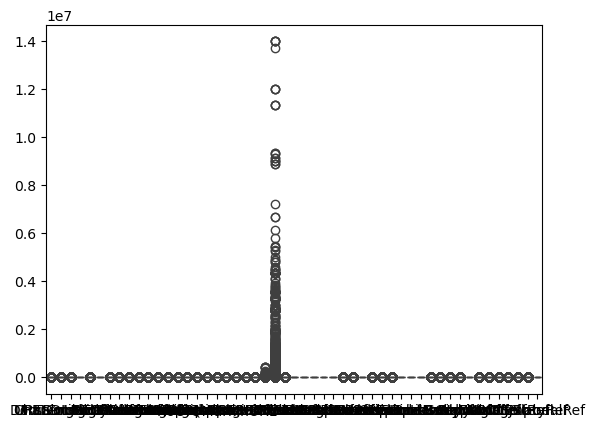

In [14]:
sns.boxplot(data=df)

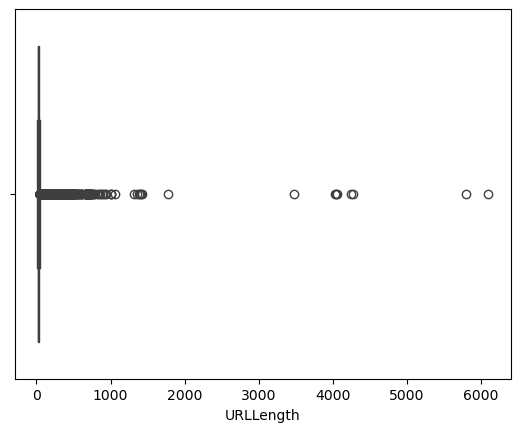

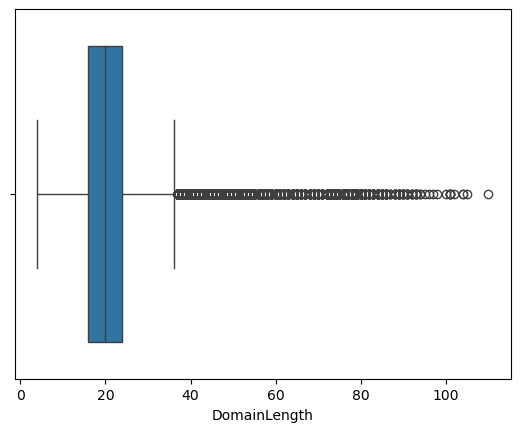

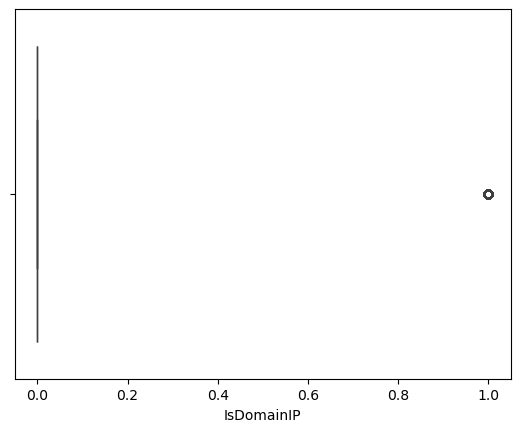

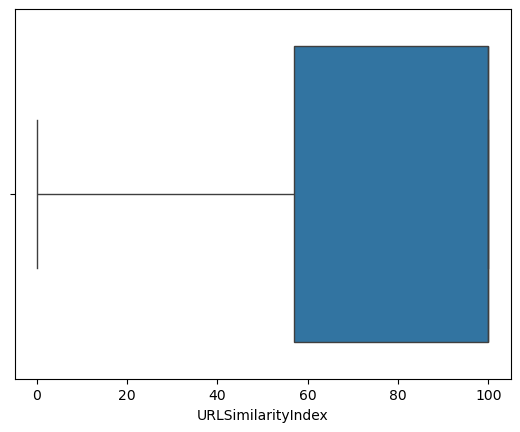

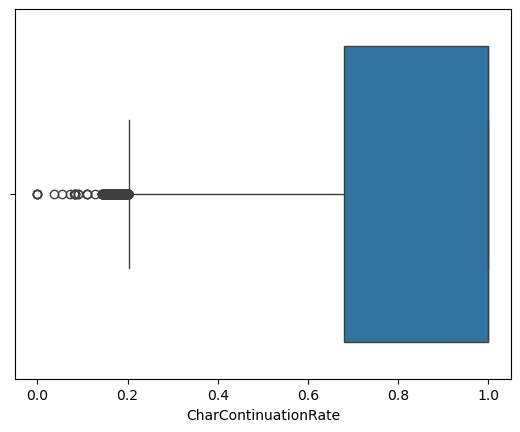

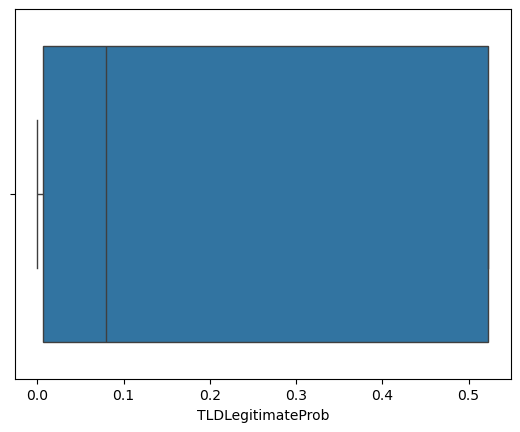

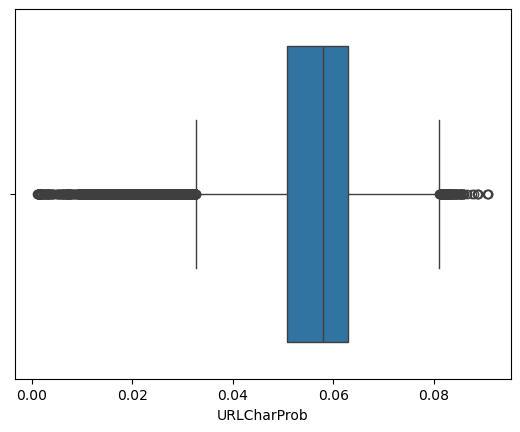

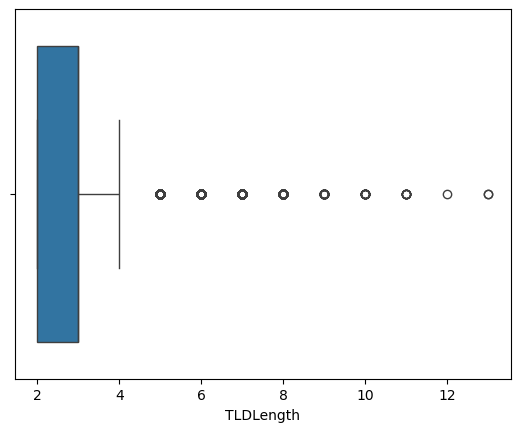

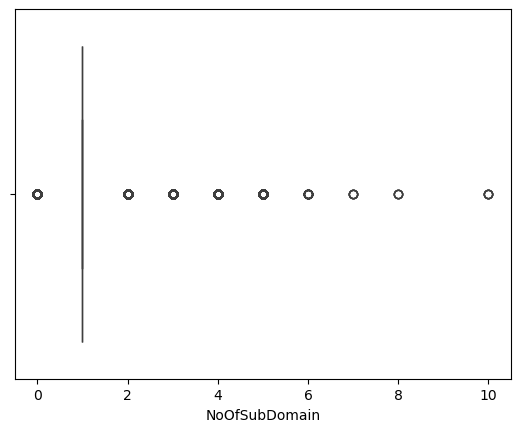

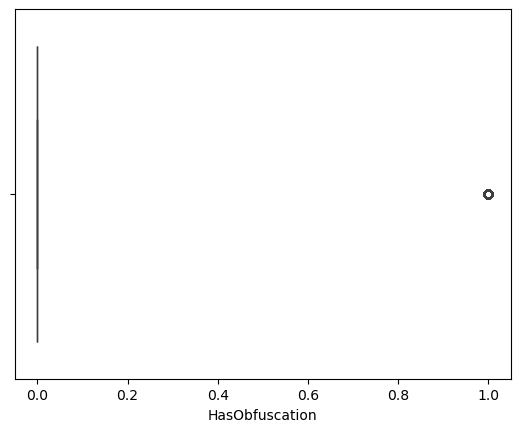

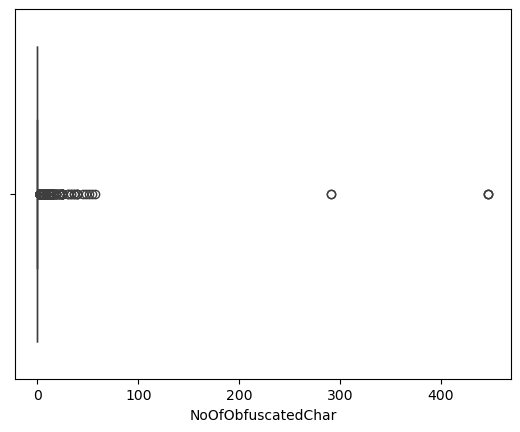

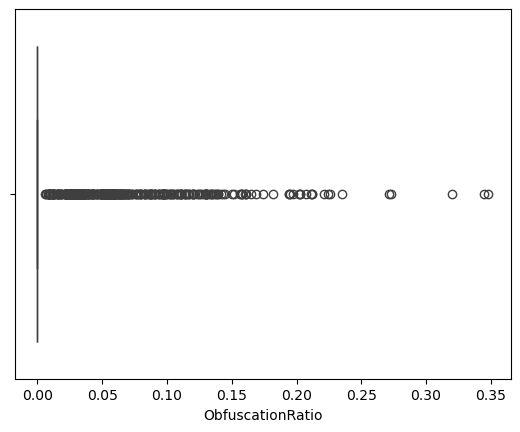

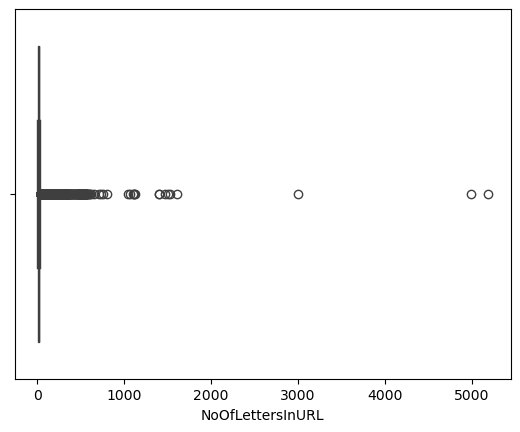

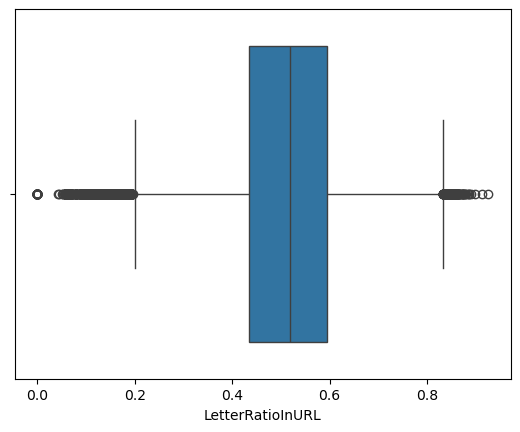

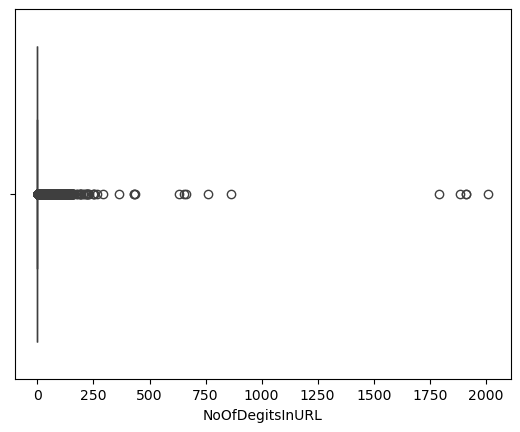

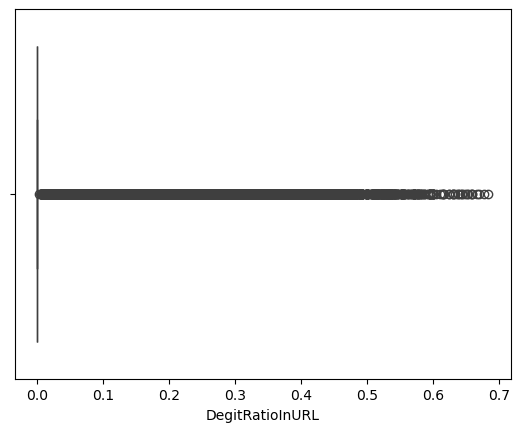

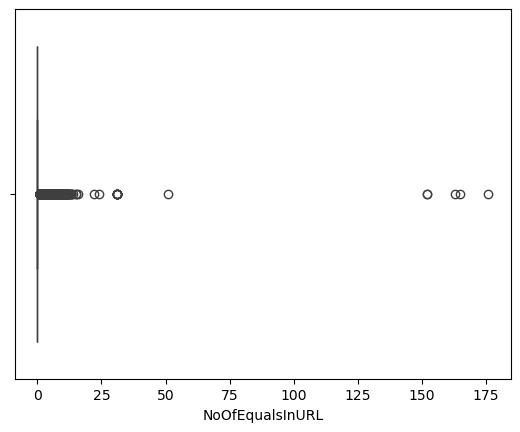

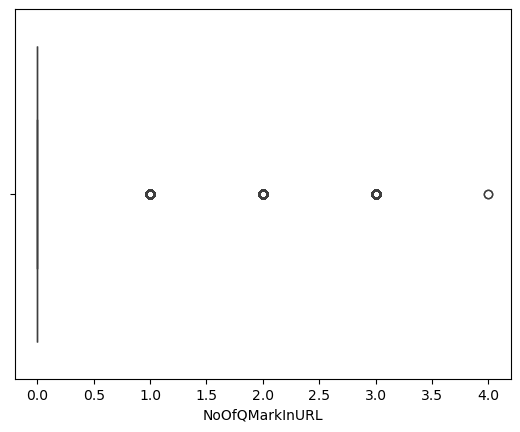

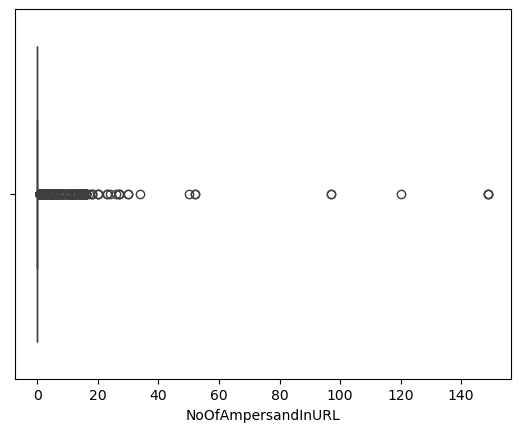

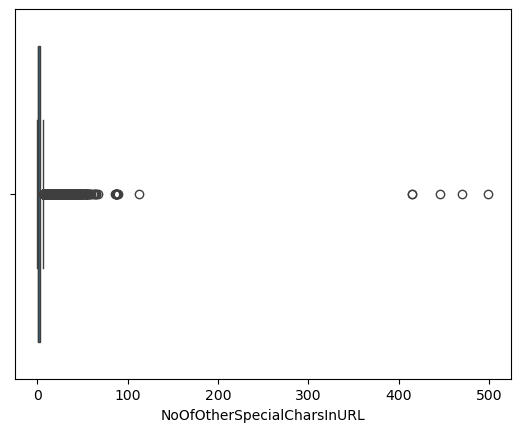

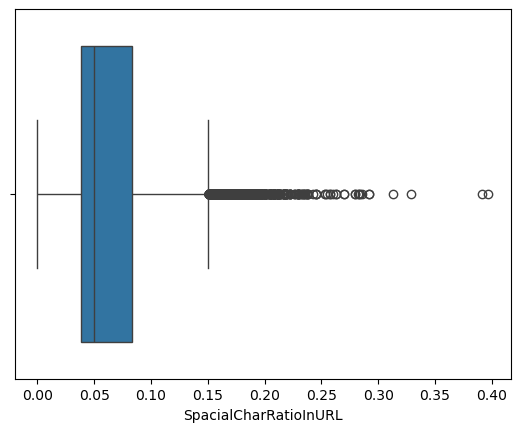

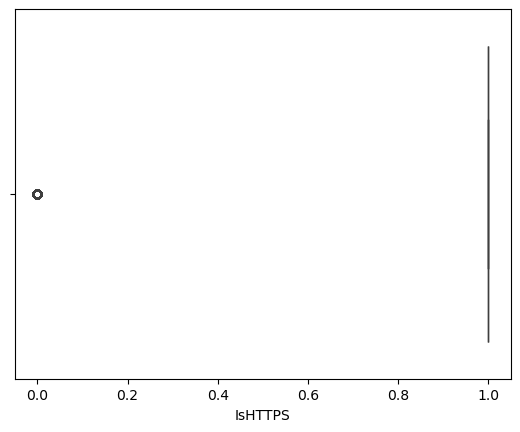

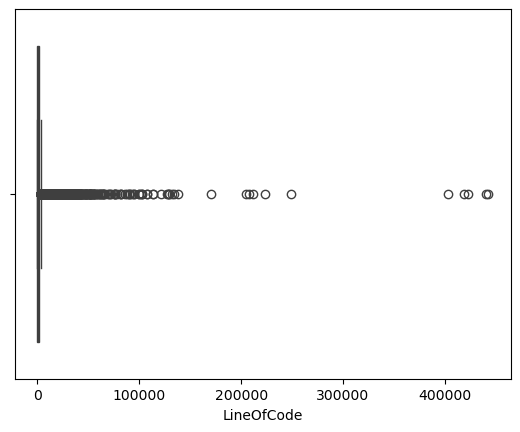

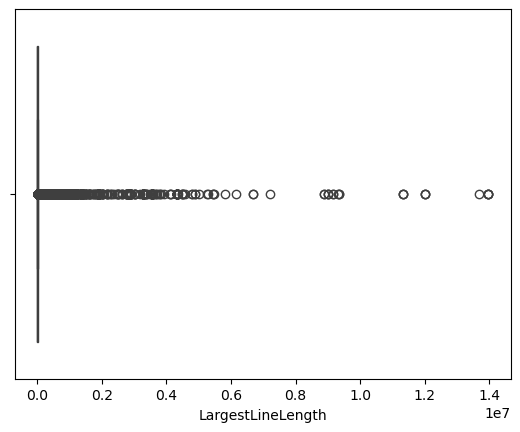

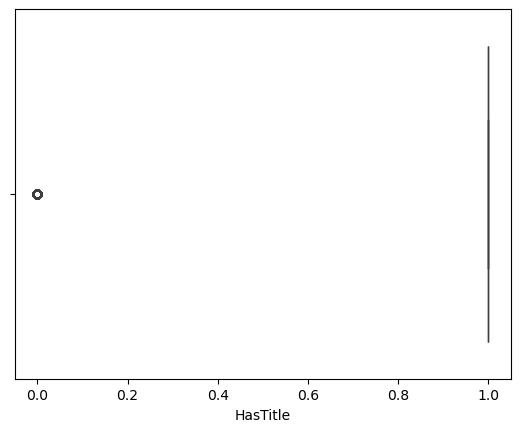

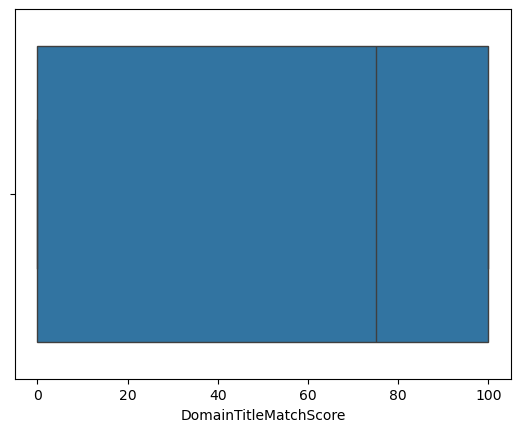

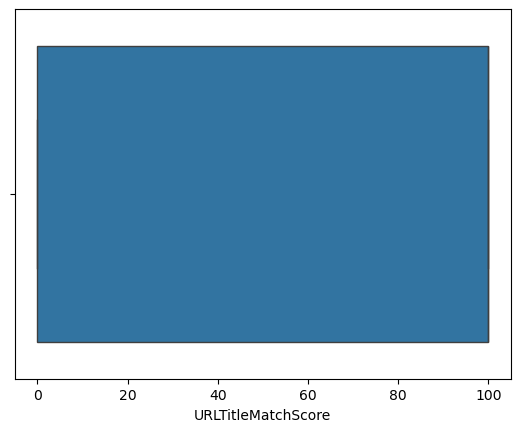

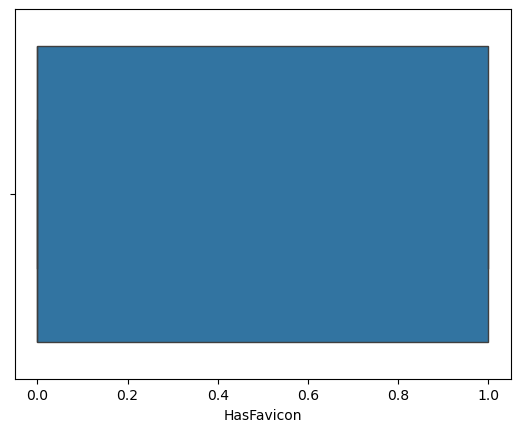

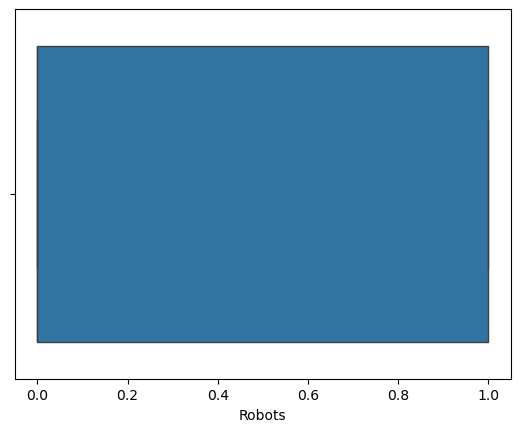

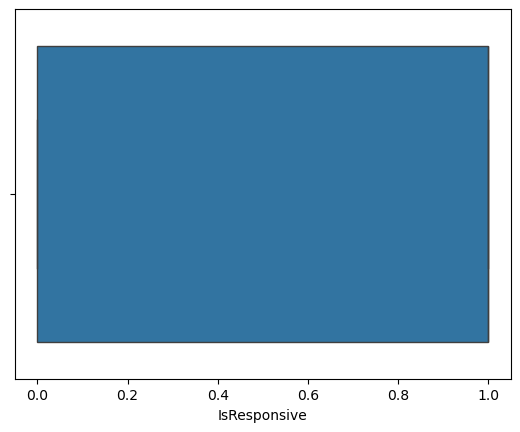

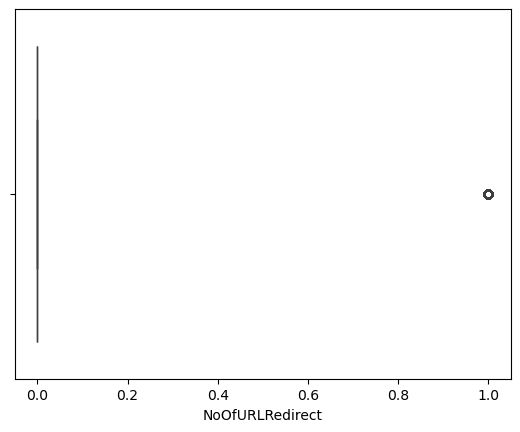

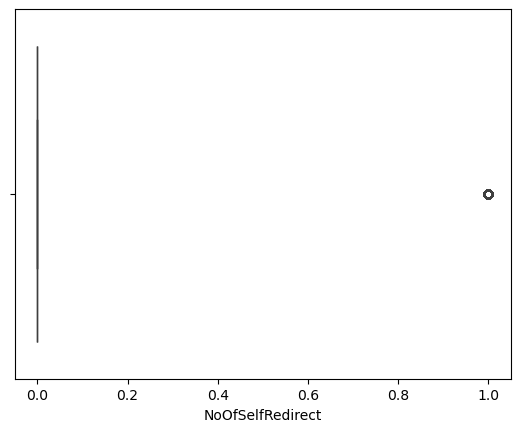

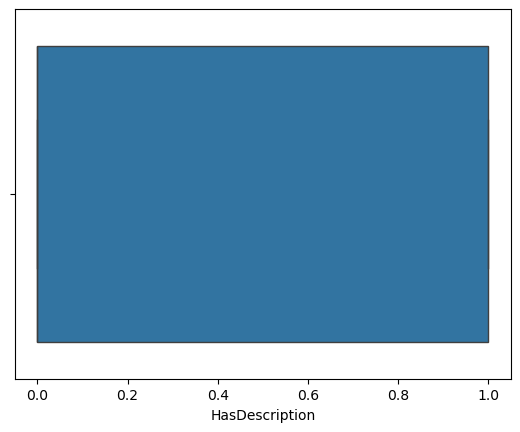

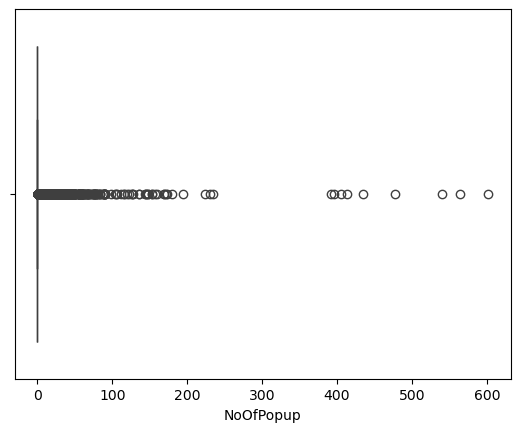

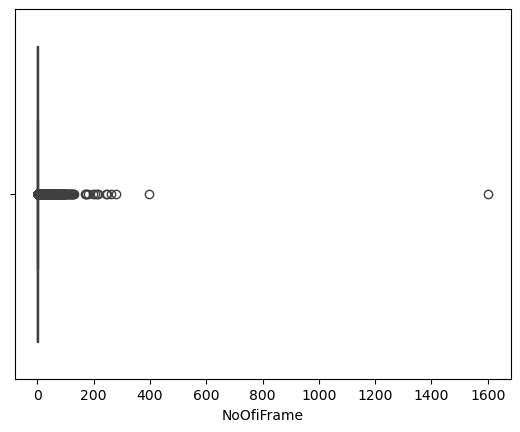

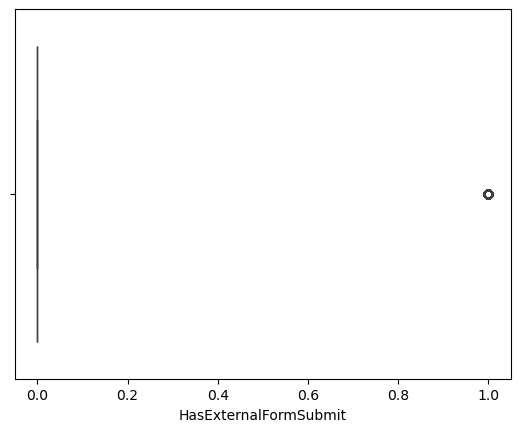

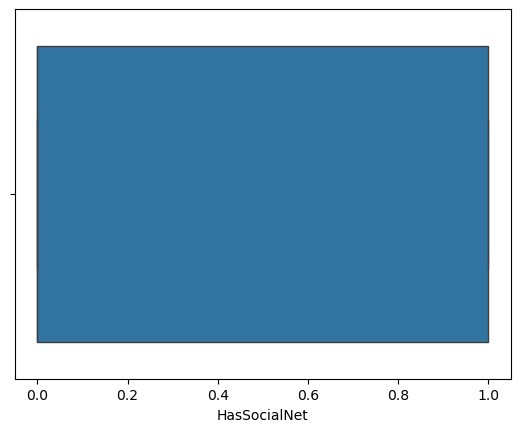

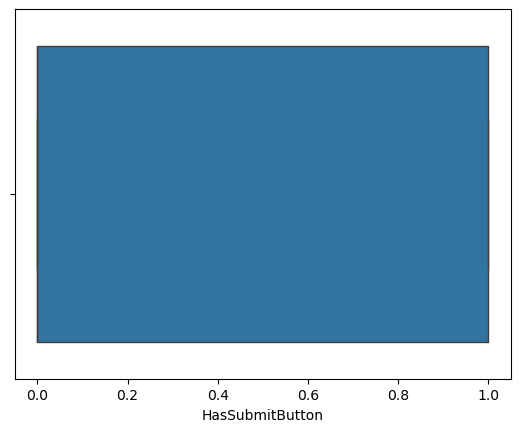

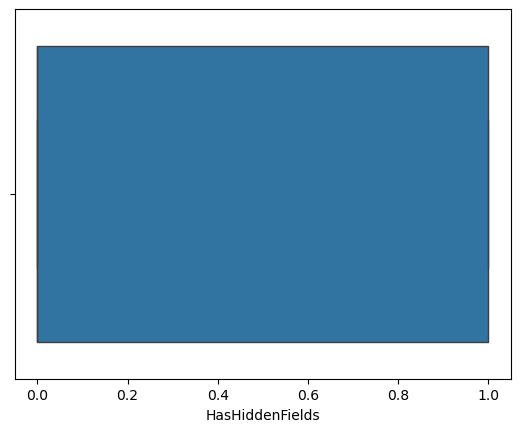

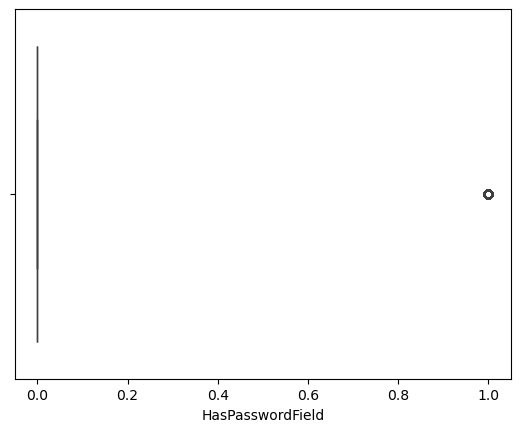

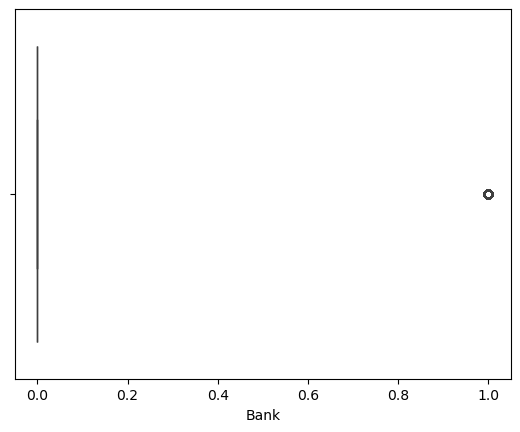

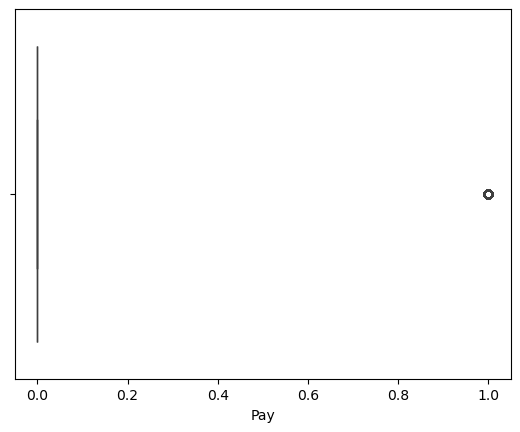

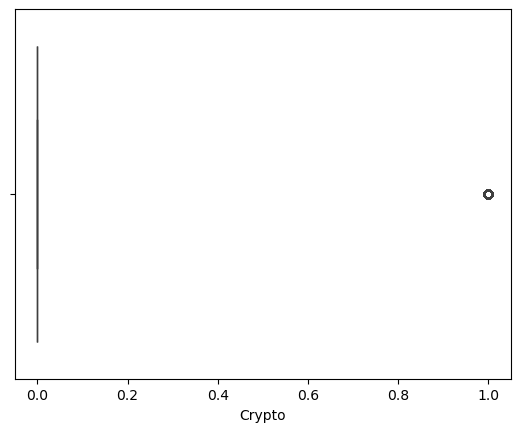

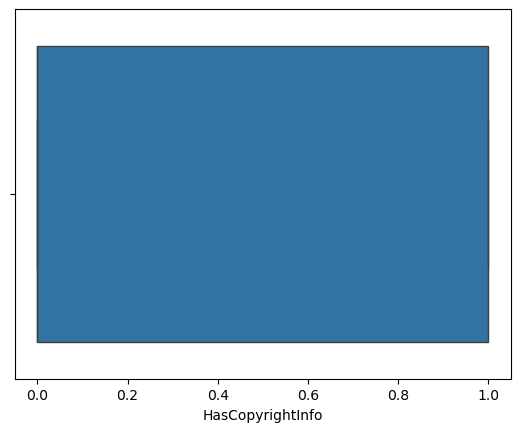

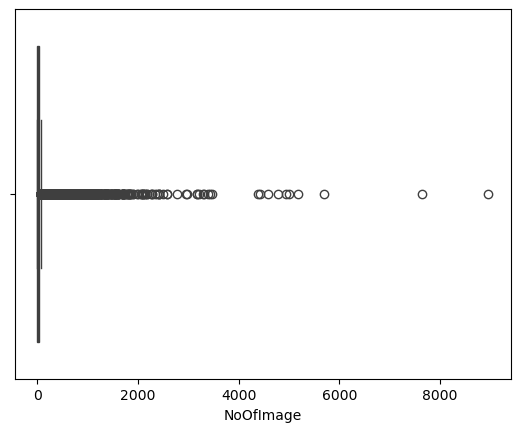

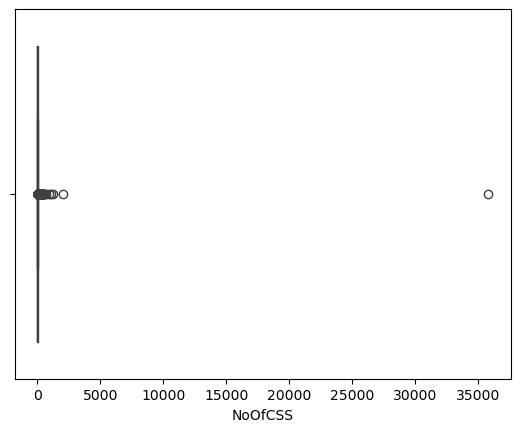

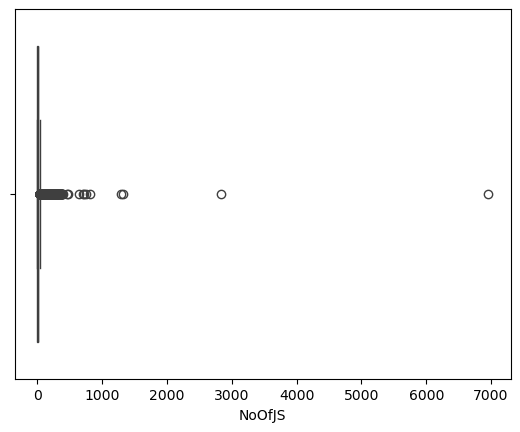

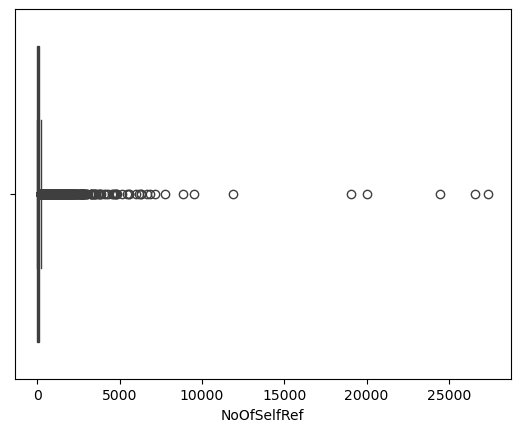

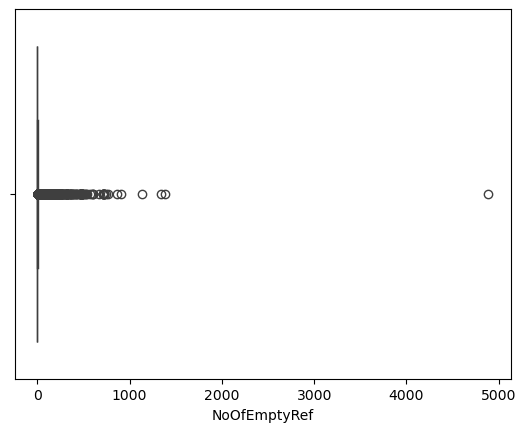

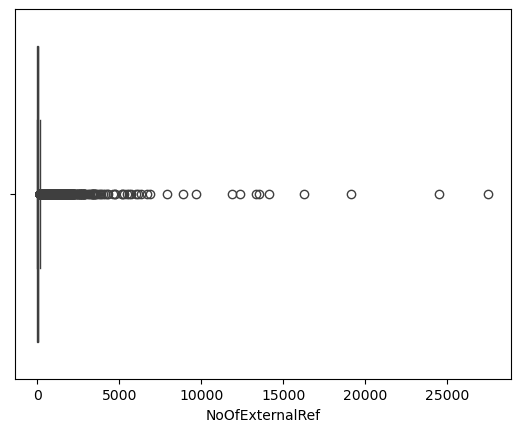

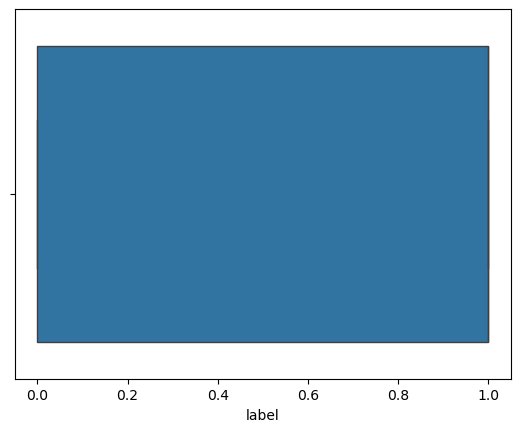

In [15]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [45]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df 

In [46]:
df1= outliers(df)

In [47]:
df1.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31.0,www.southbankmosaics.com,24.0,0.0,com,100.0,1.000000,0.522907,...,0.0,0.0,1,34.0,20.0,28.0,119.0,0.0,124.0,1
1,31372.txt,https://www.uni-mainz.de,23.0,www.uni-mainz.de,16.0,0.0,de,100.0,0.666667,0.032650,...,0.0,0.0,1,50.0,9.0,8.0,39.0,0.0,141.0,1
2,597387.txt,https://www.voicefmradio.co.uk,29.0,www.voicefmradio.co.uk,22.0,0.0,uk,100.0,0.866667,0.028555,...,0.0,0.0,1,10.0,2.0,7.0,42.0,2.0,5.0,1
3,554095.txt,https://www.sfnmjournal.com,26.0,www.sfnmjournal.com,19.0,0.0,com,100.0,1.000000,0.522907,...,0.0,0.0,1,3.0,20.0,15.0,22.0,1.0,31.0,1
4,151578.txt,https://www.rewildingargentina.org,33.0,www.rewildingargentina.org,26.0,0.0,org,100.0,1.000000,0.079963,...,0.0,0.0,1,72.5,15.0,34.0,72.0,1.0,85.0,1


<Axes: >

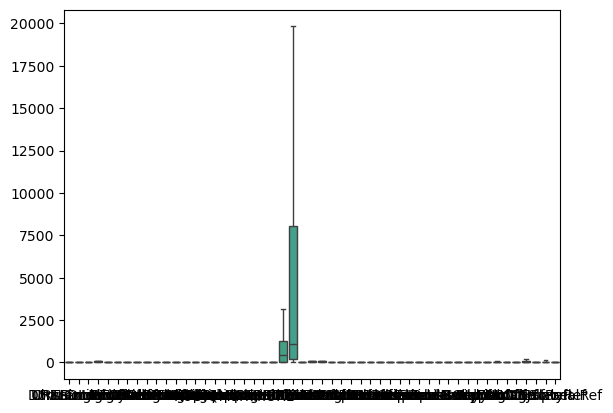

In [19]:
sns.boxplot(data=df1)

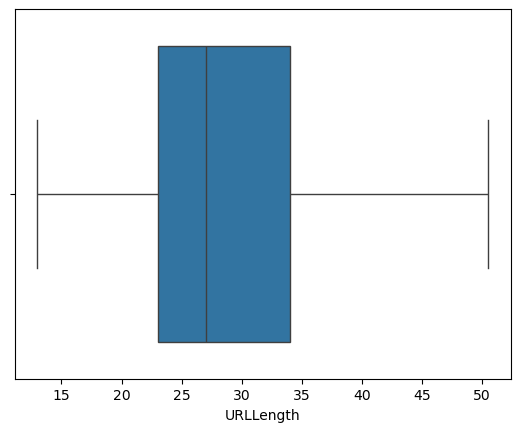

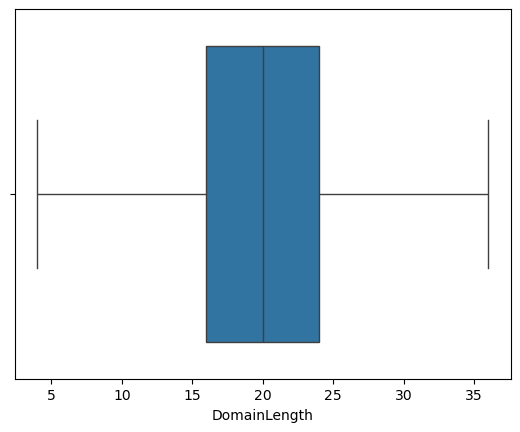

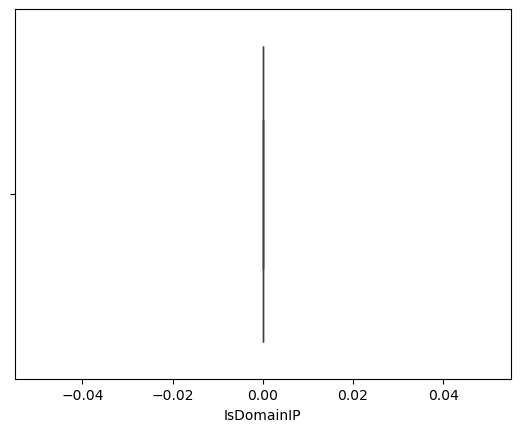

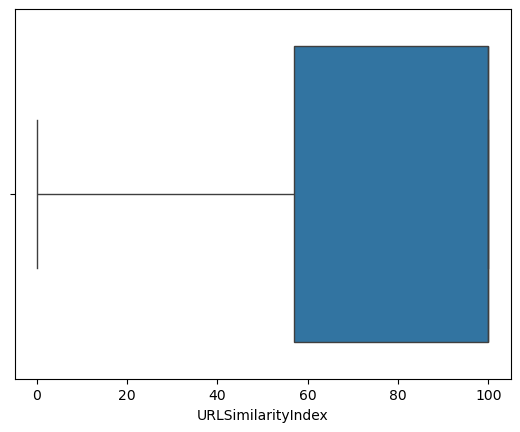

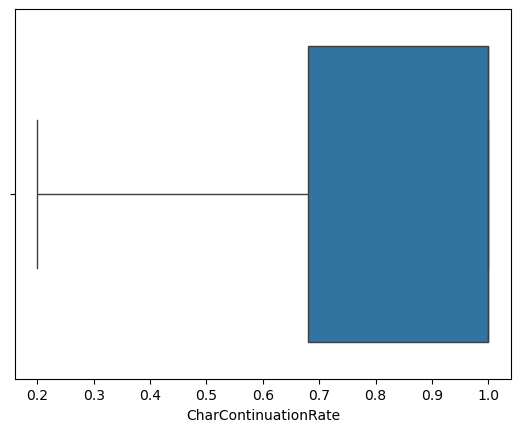

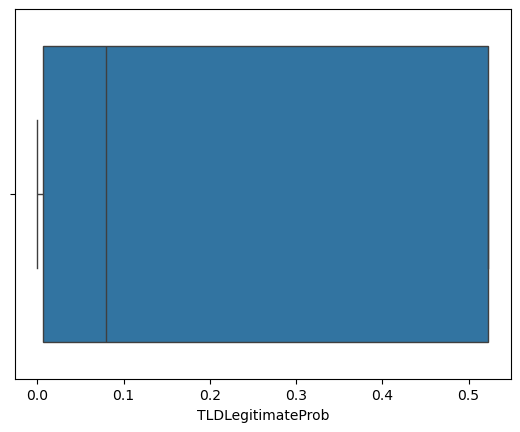

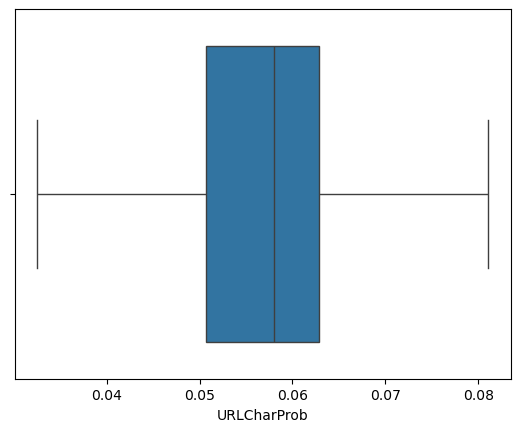

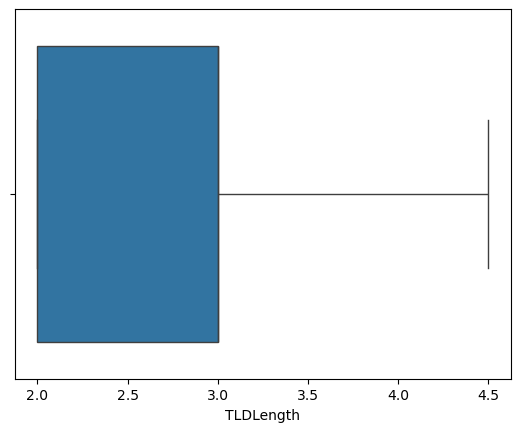

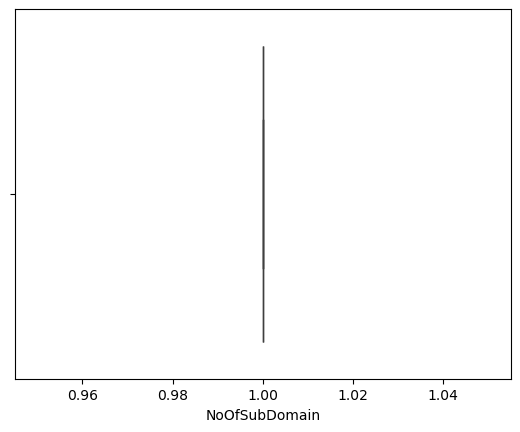

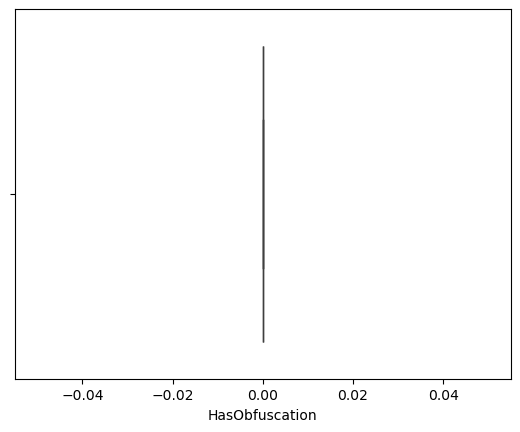

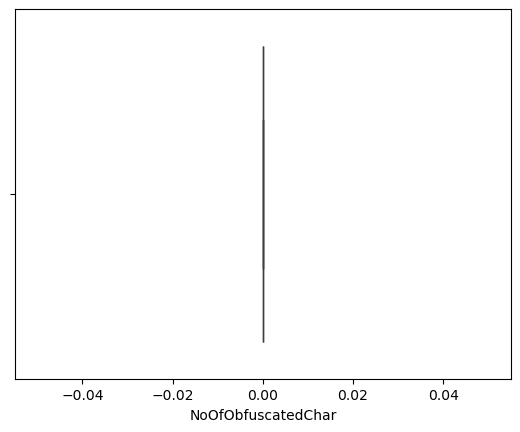

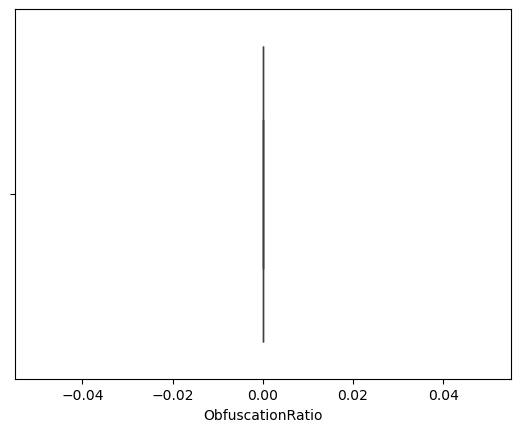

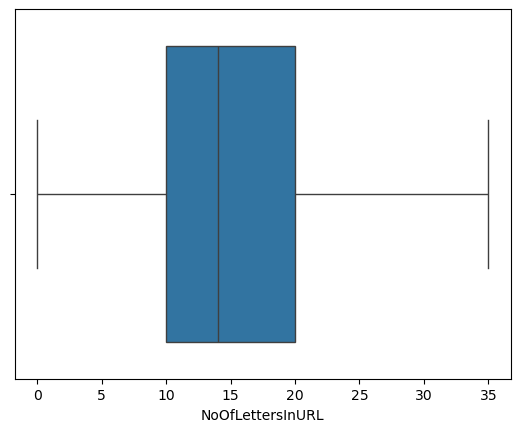

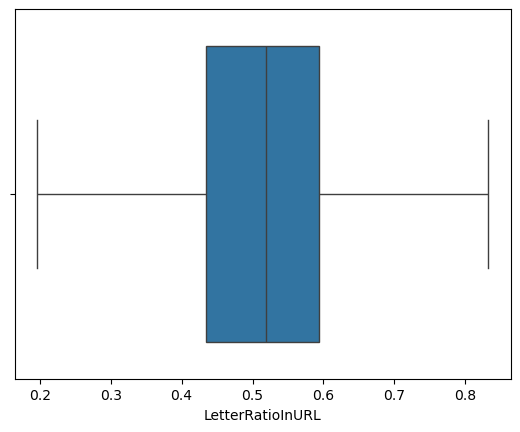

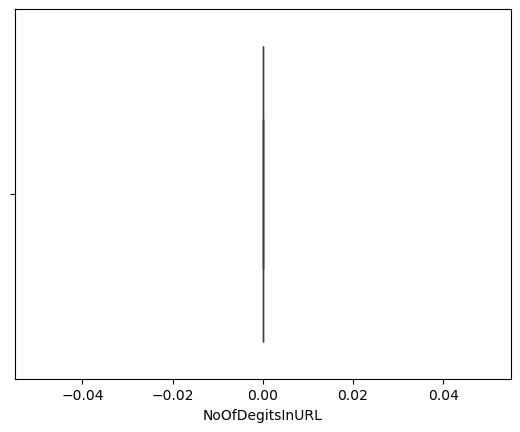

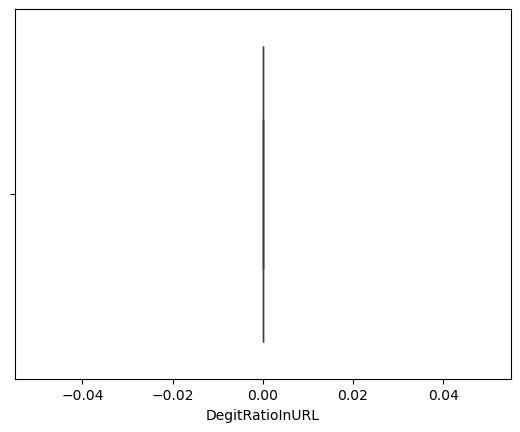

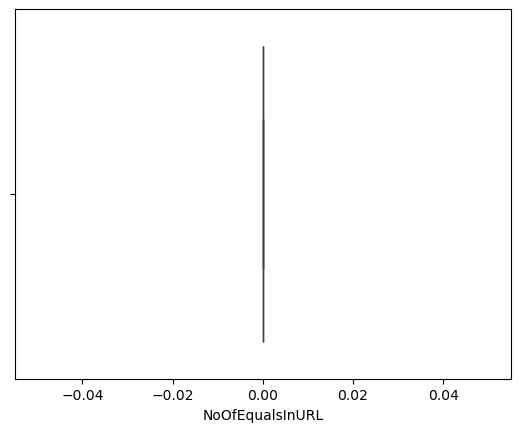

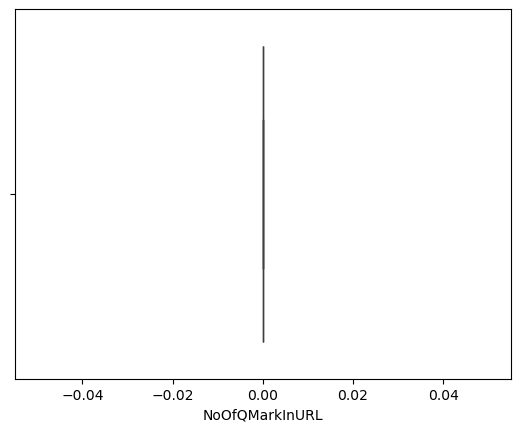

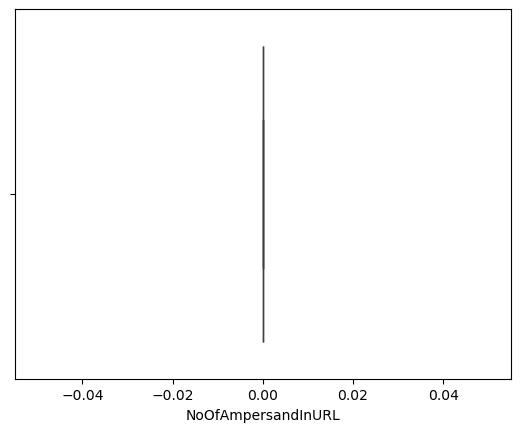

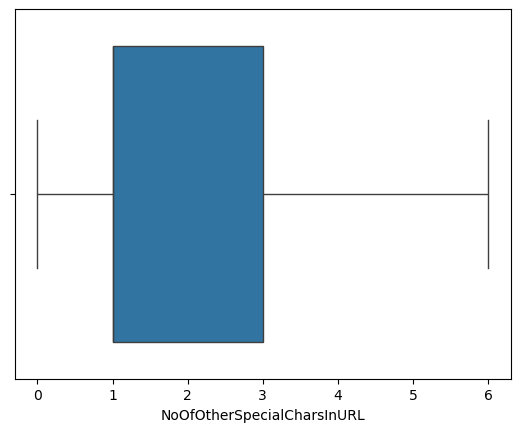

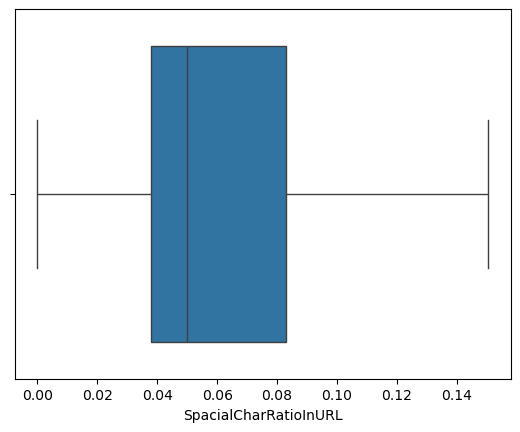

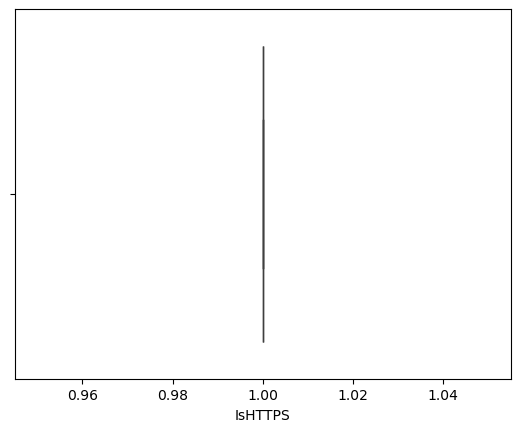

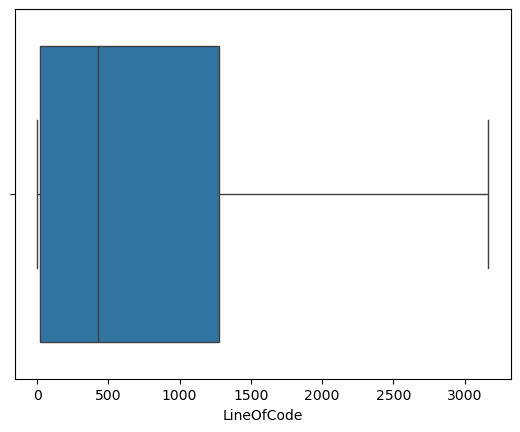

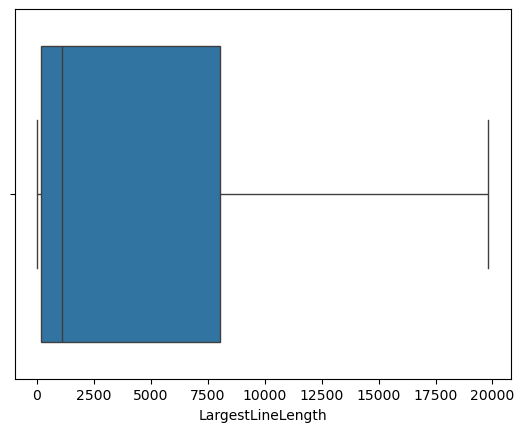

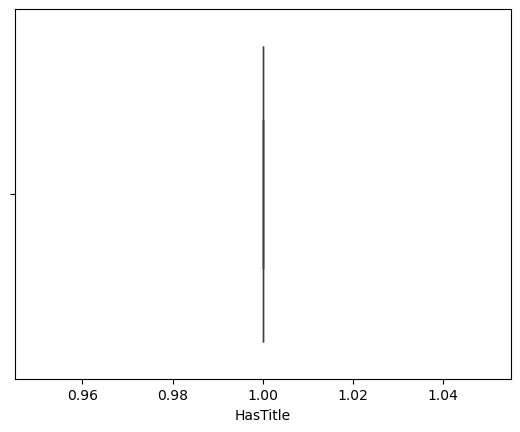

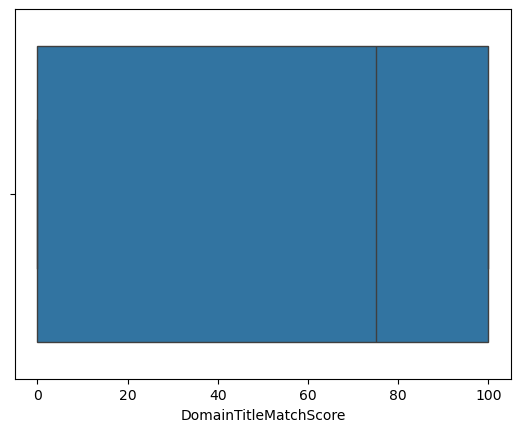

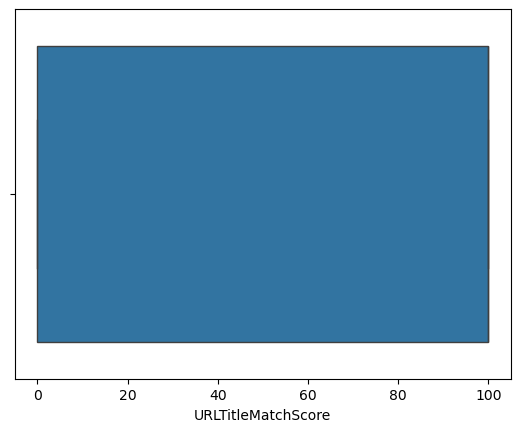

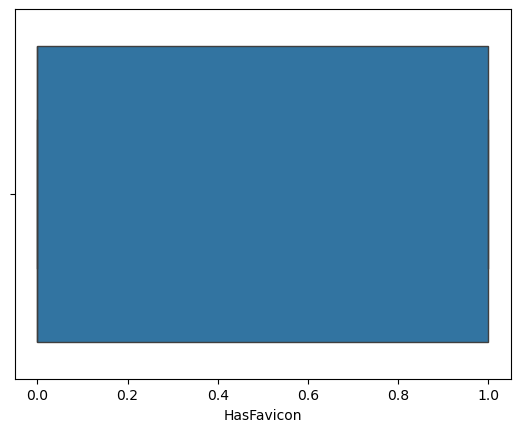

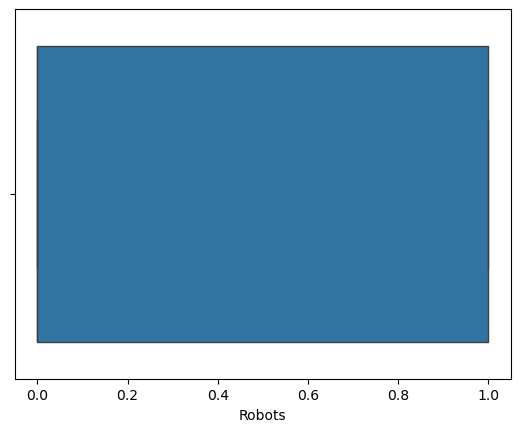

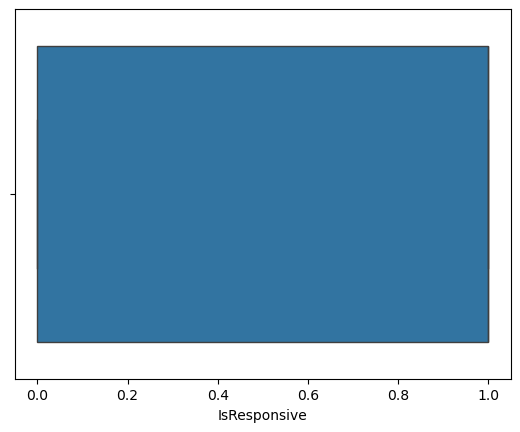

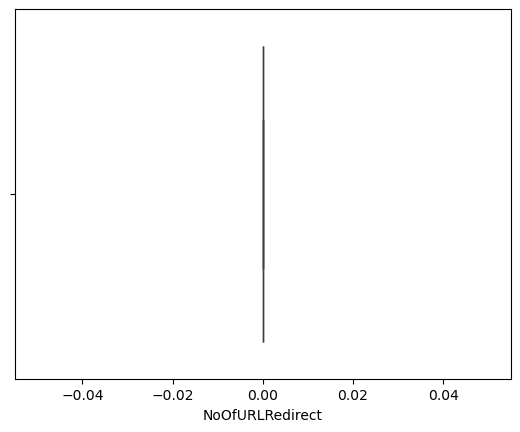

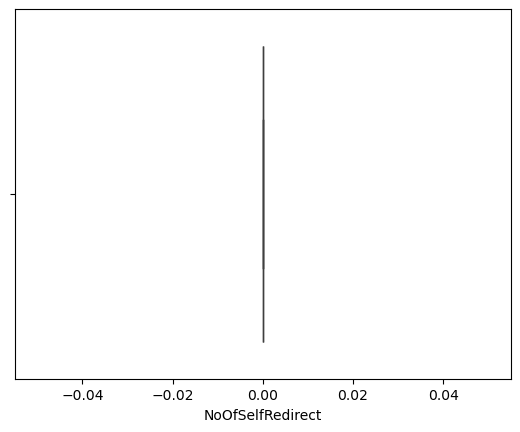

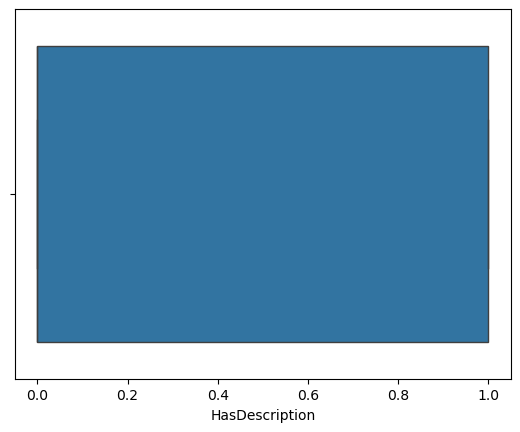

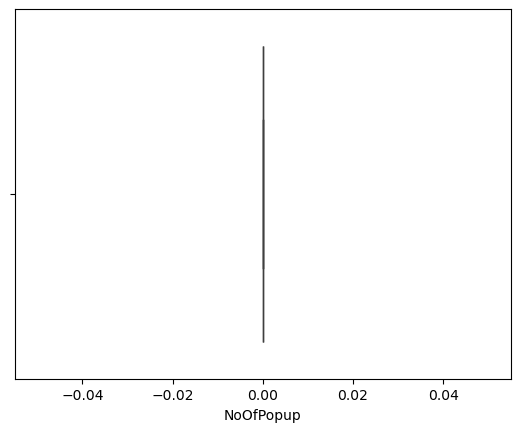

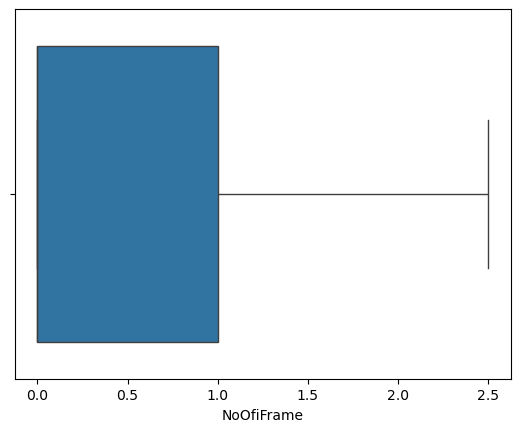

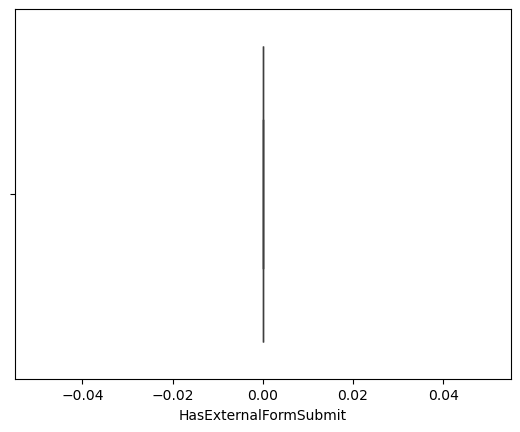

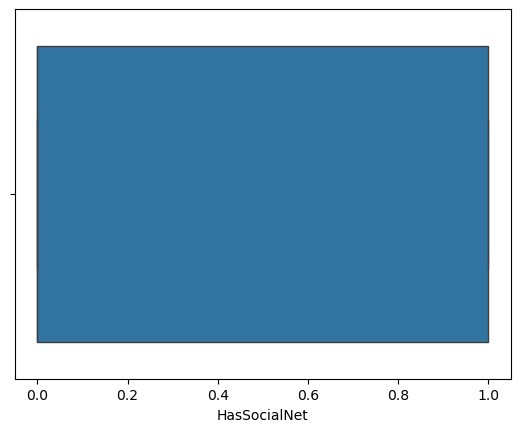

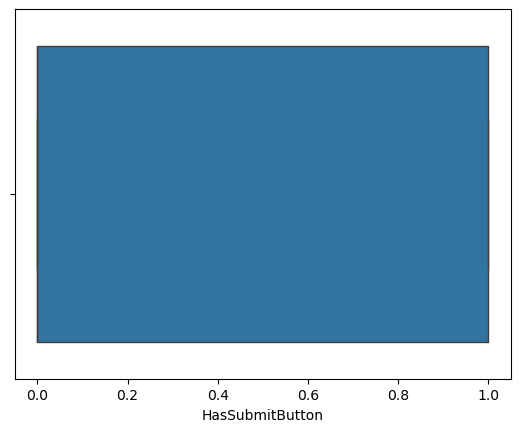

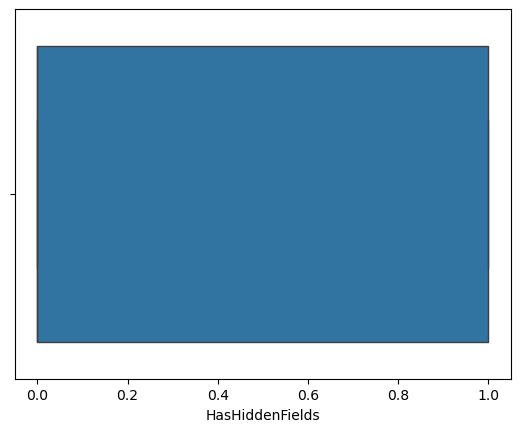

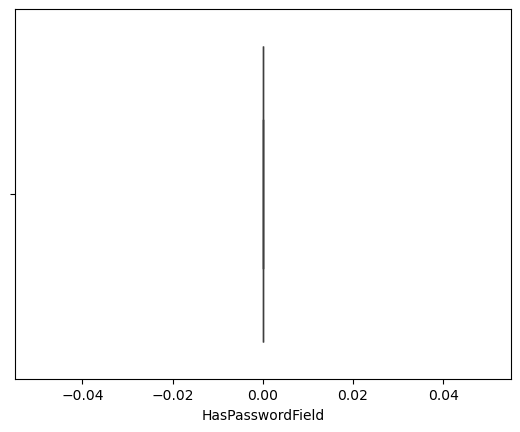

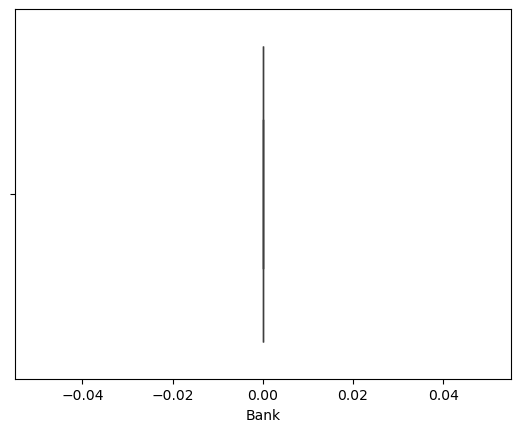

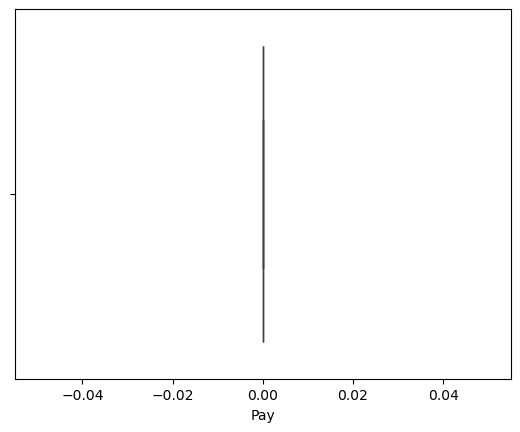

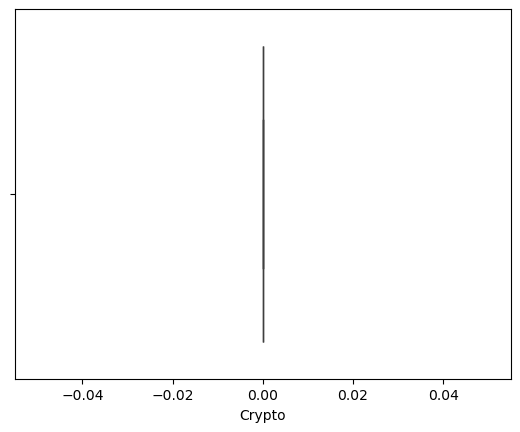

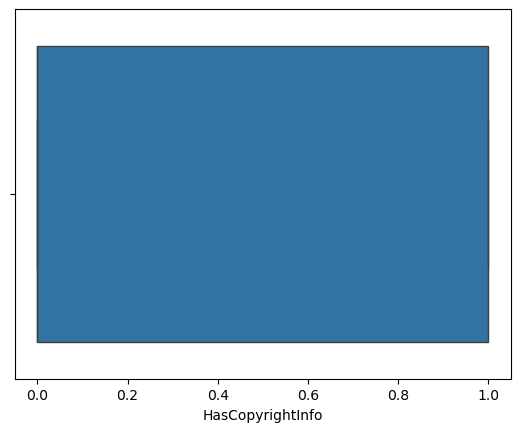

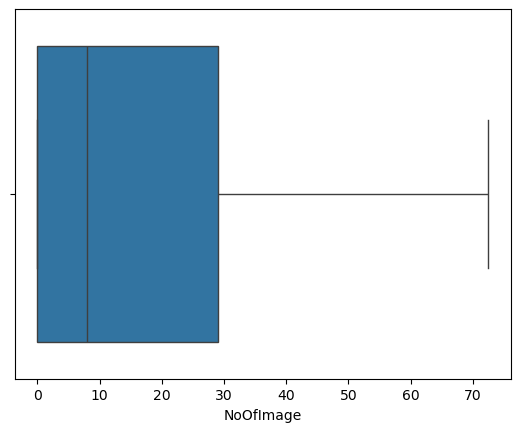

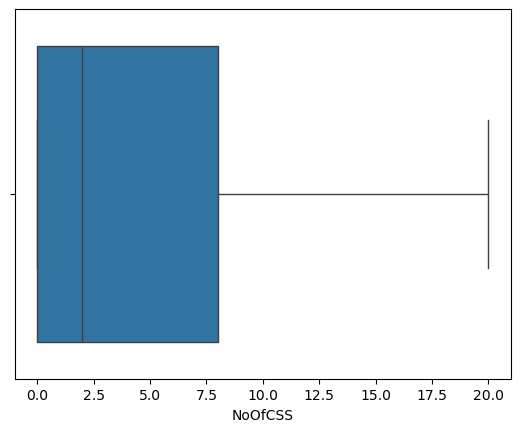

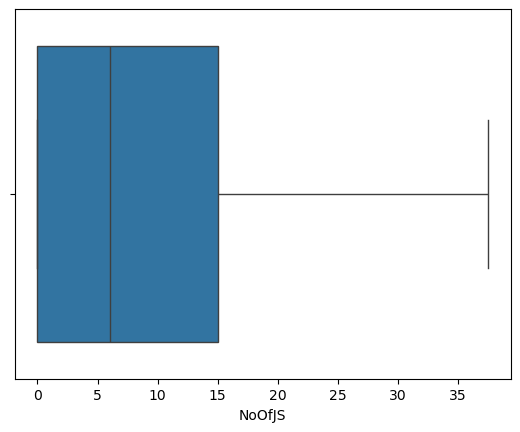

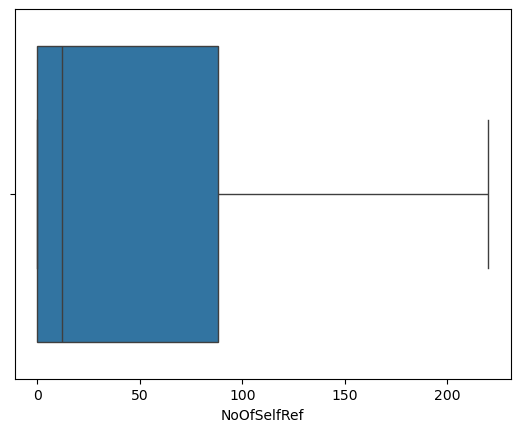

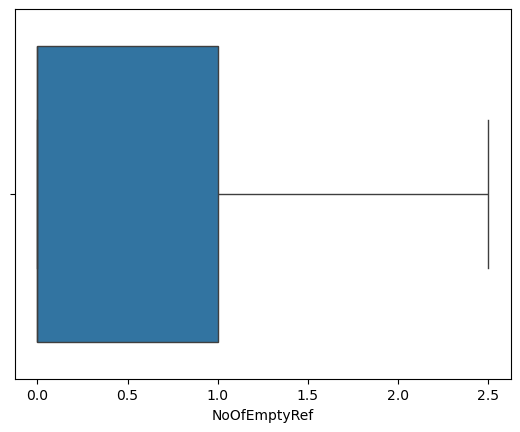

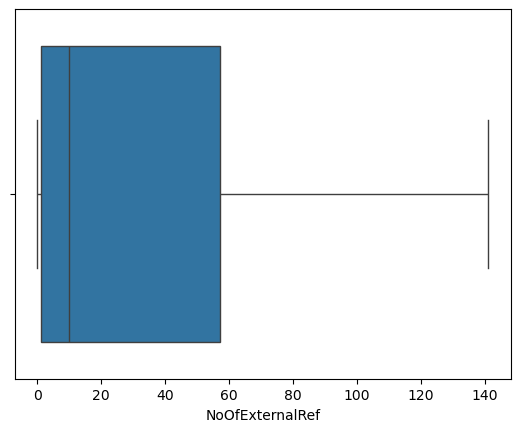

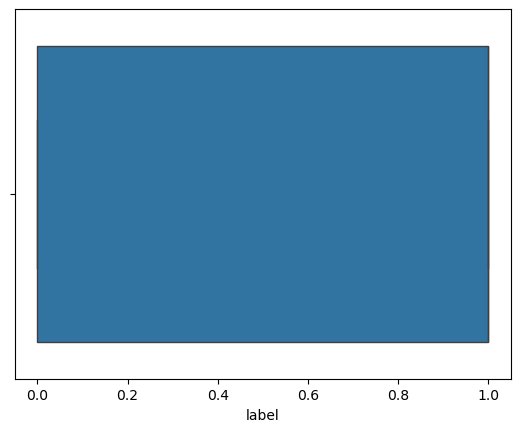

In [85]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

In [91]:
df1=df1.drop('FILENAME', axis=1)
df1.head()

,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31.0,www.southbankmosaics.com,24.0,0.0,com,100.0,1.000000,0.522907,0.061933,3.0,...,0.0,0.0,1,34.0,20.0,28.0,119.0,0.0,124.0,1
1,23.0,www.uni-mainz.de,16.0,0.0,de,100.0,0.666667,0.032650,0.050207,2.0,...,0.0,0.0,1,50.0,9.0,8.0,39.0,0.0,141.0,1
2,29.0,www.voicefmradio.co.uk,22.0,0.0,uk,100.0,0.866667,0.028555,0.064129,2.0,...,0.0,0.0,1,10.0,2.0,7.0,42.0,2.0,5.0,1
3,26.0,www.sfnmjournal.com,19.0,0.0,com,100.0,1.000000,0.522907,0.057606,3.0,...,0.0,0.0,1,3.0,20.0,15.0,22.0,1.0,31.0,1
4,33.0,www.rewildingargentina.org,26.0,0.0,org,100.0,1.000000,0.079963,0.059441,3.0,...,0.0,0.0,1,72.5,15.0,34.0,72.0,1.0,85.0,1


In [126]:
df1.head(10)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31.0,24.0,0.0,100.0,1.000000,0.522907,0.061933,3.0,1.0,0.0,...,0.0,0.0,1,34.0,20.0,28.0,119.0,0.0,124.0,1
1,23.0,16.0,0.0,100.0,0.666667,0.032650,0.050207,2.0,1.0,0.0,...,0.0,0.0,1,50.0,9.0,8.0,39.0,0.0,141.0,1
2,29.0,22.0,0.0,100.0,0.866667,0.028555,0.064129,2.0,1.0,0.0,...,0.0,0.0,1,10.0,2.0,7.0,42.0,2.0,5.0,1
3,26.0,19.0,0.0,100.0,1.000000,0.522907,0.057606,3.0,1.0,0.0,...,0.0,0.0,1,3.0,20.0,15.0,22.0,1.0,31.0,1
4,33.0,26.0,0.0,100.0,1.000000,0.079963,0.059441,3.0,1.0,0.0,...,0.0,0.0,1,72.5,15.0,34.0,72.0,1.0,85.0,1
5,30.0,23.0,0.0,100.0,1.000000,0.079963,0.060614,3.0,1.0,0.0,...,0.0,0.0,1,35.0,1.0,11.0,86.0,0.0,14.0,1
6,25.0,18.0,0.0,100.0,1.000000,0.522907,0.063549,3.0,1.0,0.0,...,0.0,0.0,1,32.0,4.0,14.0,44.0,2.0,17.0,1
7,25.0,18.0,0.0,100.0,1.000000,0.522907,0.060486,3.0,1.0,0.0,...,0.0,0.0,1,24.0,2.0,22.0,36.0,0.0,15.0,1
8,29.0,22.0,0.0,100.0,1.000000,0.005084,0.056980,2.0,1.0,0.0,...,0.0,0.0,1,71.0,4.0,9.0,40.0,1.0,141.0,1
9,18.0,11.0,0.0,100.0,1.000000,0.079963,0.070497,3.0,1.0,0.0,...,0.0,0.0,1,10.0,1.0,12.0,173.0,2.5,65.0,1


In [128]:
df1.tail(10)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235785,32.0,25.0,0.0,100.000000,1.000000,0.522907,0.055270,3.0,1.0,0.0,...,0.0,0.0,1,4.0,9.0,12.0,17.0,1.0,1.0,1
235786,29.0,22.0,0.0,100.000000,1.000000,0.079963,0.067248,3.0,1.0,0.0,...,0.0,0.0,1,2.0,7.0,15.0,30.0,2.5,3.0,1
235787,34.0,27.0,0.0,100.000000,0.550000,0.032650,0.058636,2.0,1.0,0.0,...,0.0,0.0,0,3.0,6.0,12.0,220.0,0.0,141.0,1
235788,23.0,16.0,0.0,100.000000,1.000000,0.522907,0.058494,3.0,1.0,0.0,...,0.0,0.0,1,21.0,3.0,22.0,31.0,0.0,8.0,1
235789,30.0,23.0,0.0,100.000000,0.533333,0.522907,0.065126,3.0,1.0,0.0,...,0.0,0.0,1,43.0,1.0,16.0,42.0,0.0,44.0,1
235790,29.0,22.0,0.0,100.000000,1.000000,0.522907,0.058739,3.0,1.0,0.0,...,0.0,0.0,1,51.0,7.0,21.0,187.0,2.0,141.0,1
235791,28.0,21.0,0.0,100.000000,0.785714,0.028555,0.053834,2.0,1.0,0.0,...,0.0,0.0,0,50.0,1.0,7.0,88.0,0.0,31.0,1
235792,30.0,23.0,0.0,100.000000,1.000000,0.003319,0.063093,2.0,1.0,0.0,...,0.0,0.0,1,27.0,10.0,30.0,58.0,2.0,67.0,1
235793,50.5,36.0,0.0,28.157537,0.465116,0.000961,0.050211,3.0,1.0,0.0,...,0.0,0.0,0,0.0,0.0,3.0,0.0,0.0,0.0,0
235794,33.0,26.0,0.0,100.000000,1.000000,0.522907,0.060596,3.0,1.0,0.0,...,0.0,0.0,1,21.0,6.0,18.0,220.0,0.0,141.0,1


In [140]:
df1.select_dtypes(exclude=['number']).columns

Index(['Title'], dtype='object')

In [144]:
df1=df1.drop('Title', axis=1)

In [142]:
x.select_dtypes(exclude=['number']).head()


,Title
0,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,johannes gutenberg-universitÃ¤t mainz
2,voice fm southampton
3,home page: seminars in fetal and neonatal medi...
4,fundaciÃ³n rewilding argentina


In [146]:
x = df1.drop('label', axis=1)
y = df1['label']

In [149]:
x.skew()

URLLength                     1.006092
DomainLength                  0.644121
IsDomainIP                    0.000000
URLSimilarityIndex           -0.989903
CharContinuationRate         -1.124225
TLDLegitimateProb             0.073090
URLCharProb                  -0.691995
TLDLength                    -0.029784
NoOfSubDomain                 0.000000
HasObfuscation                0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL              0.925669
LetterRatioInURL             -0.007357
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    1.434182
SpacialCharRatioInURL         1.025902
IsHTTPS                       0.000000
LineOfCode                    1.215156
LargestLineLength             1.453674
HasTitle                      0.000000
DomainTitleMatchScore    

In [157]:
from sklearn.preprocessing import PowerTransformer

In [159]:
pt = PowerTransformer(method = 'yeo-johnson') # to reduce the skewness 

In [161]:
numerical_col = df1.select_dtypes(include= 'number').columns
df1[numerical_col] = pt.fit_transform(df1[numerical_col])
print(df1[numerical_col].skew())

URLLength                     0.056078
DomainLength                  0.003838
IsDomainIP                    0.000000
URLSimilarityIndex           -0.672469
CharContinuationRate         -0.604830
TLDLegitimateProb             0.061075
URLCharProb                  -0.038111
TLDLength                    -0.002843
NoOfSubDomain                 0.000000
HasObfuscation                0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL             -0.001437
LetterRatioInURL             -0.004879
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    0.457619
SpacialCharRatioInURL         0.273857
IsHTTPS                       0.000000
LineOfCode                   -0.196693
LargestLineLength            -0.044627
HasTitle                      0.000000
DomainTitleMatchScore    

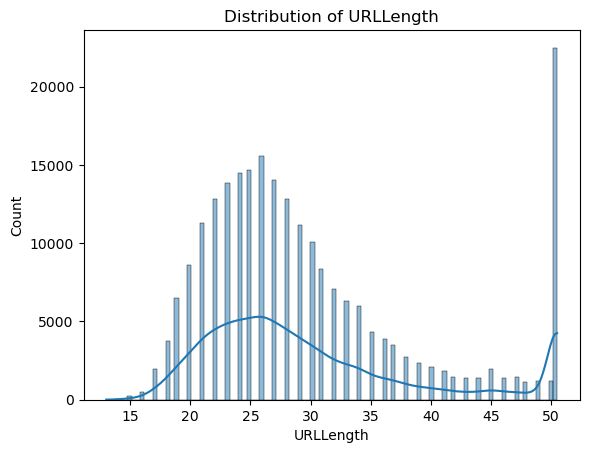

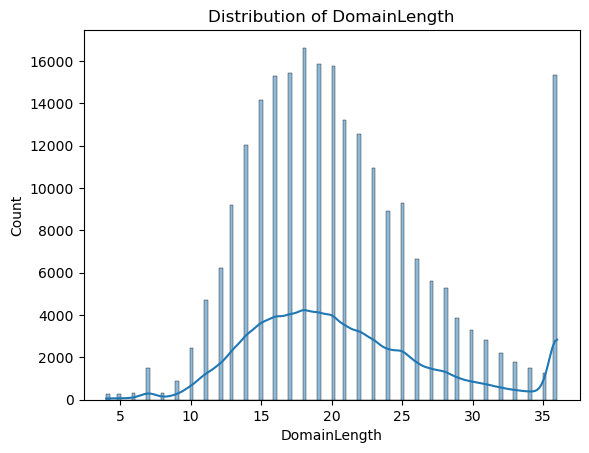

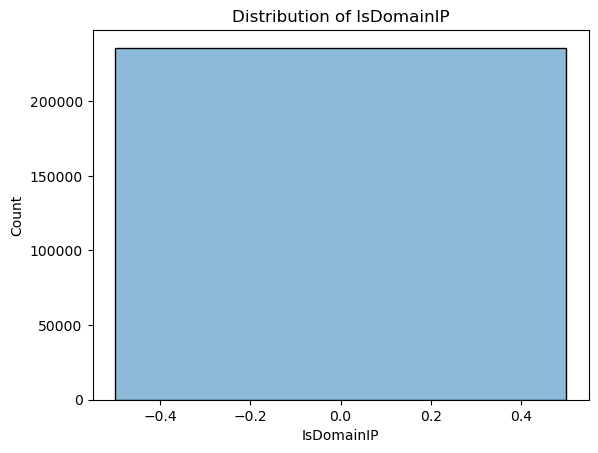

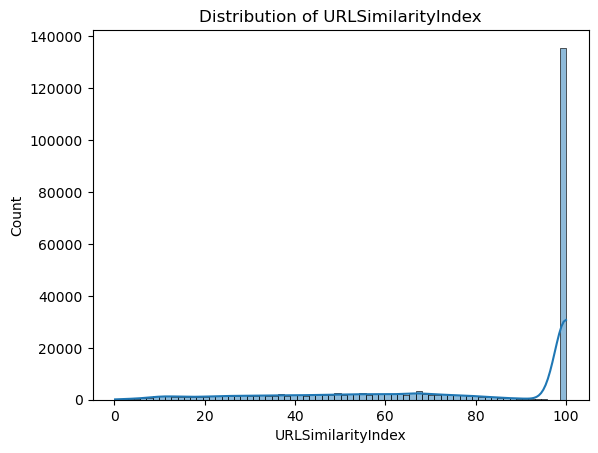

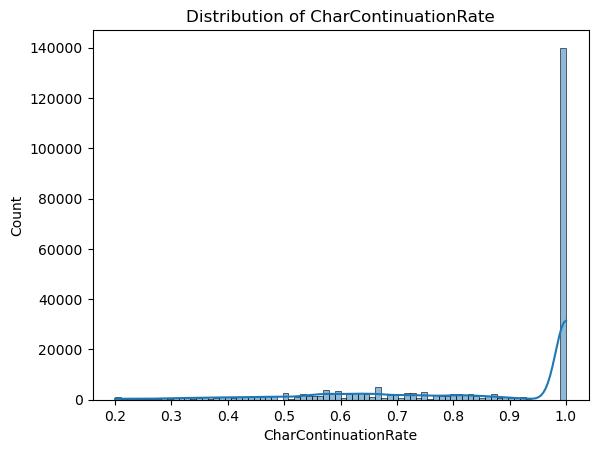

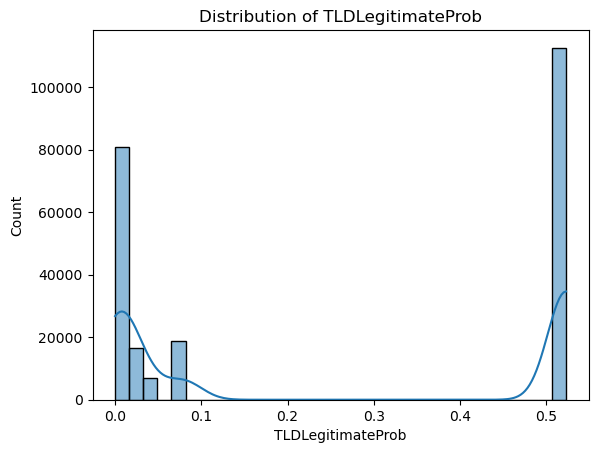

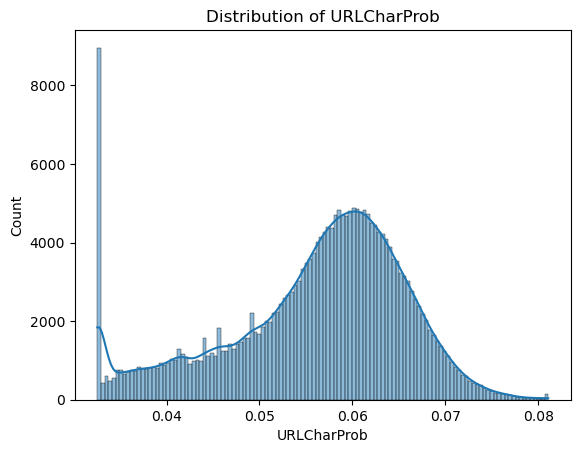

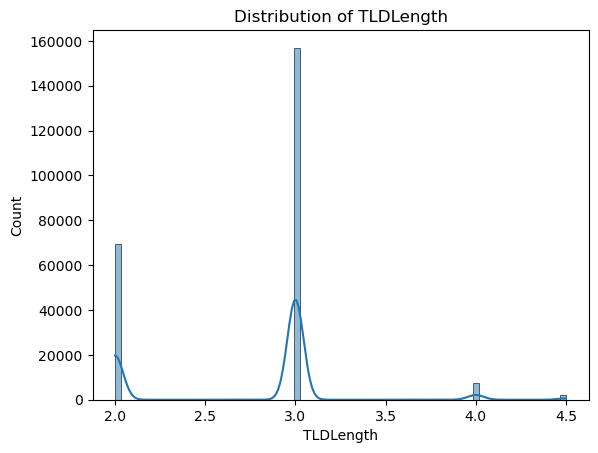

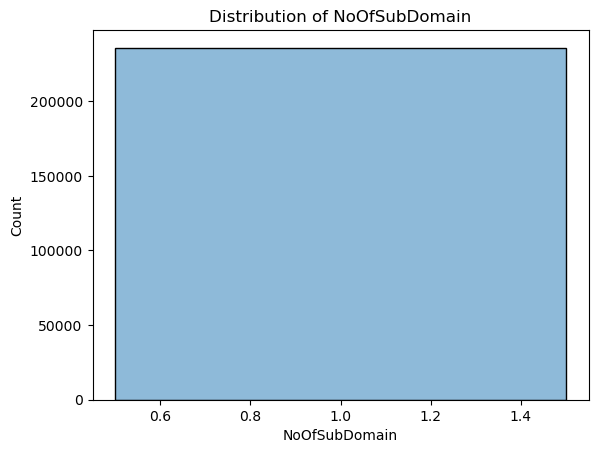

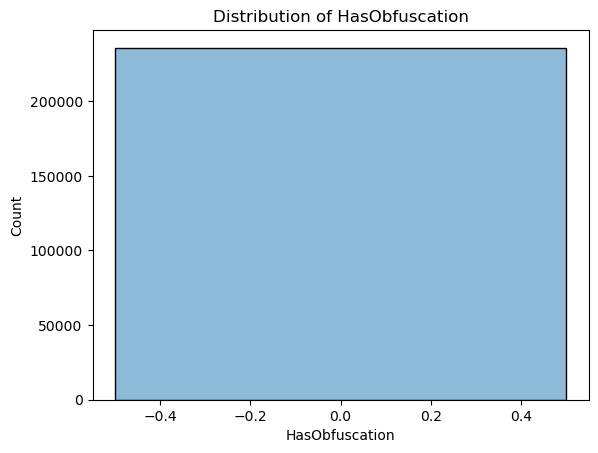

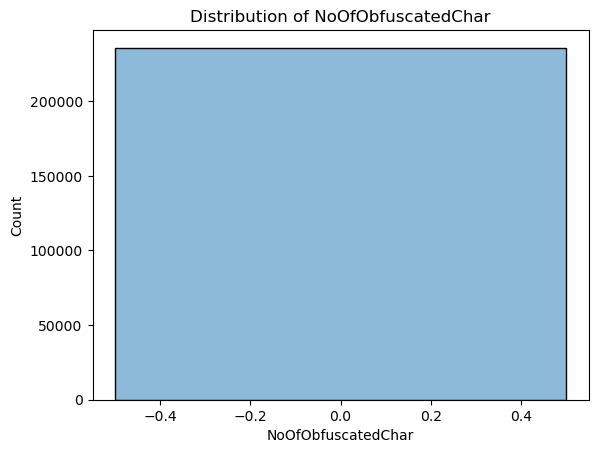

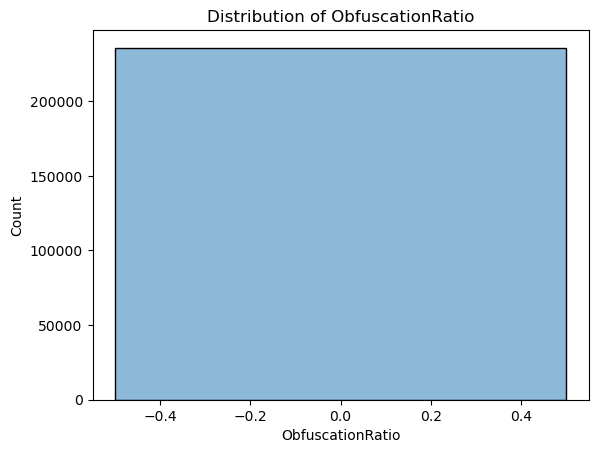

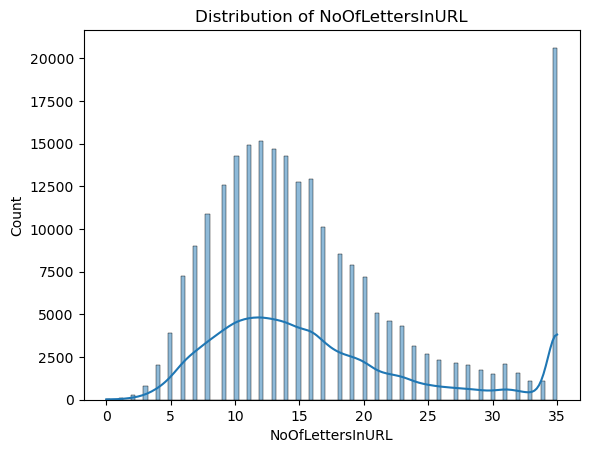

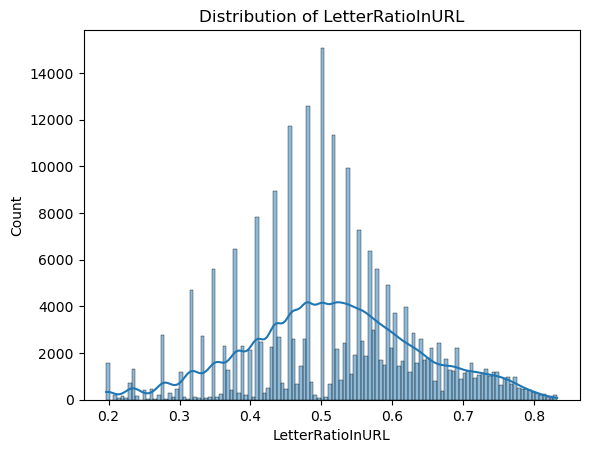

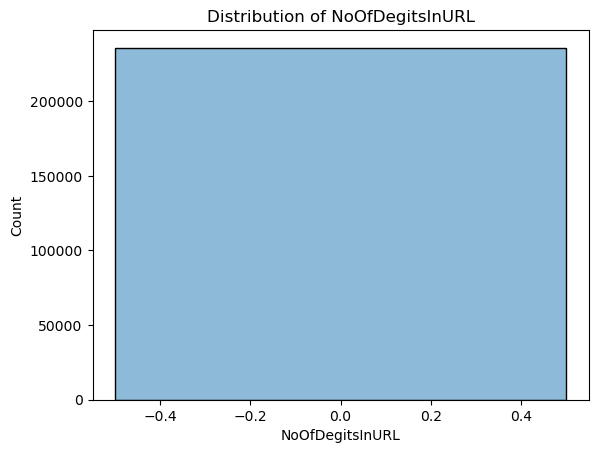

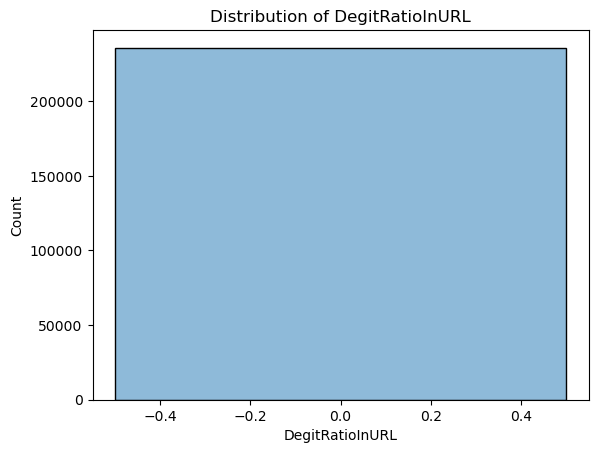

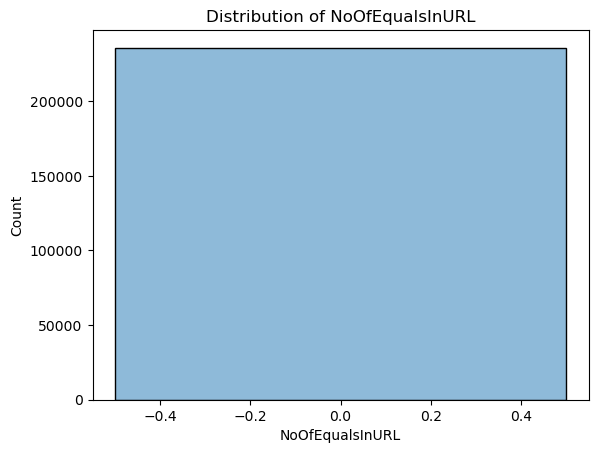

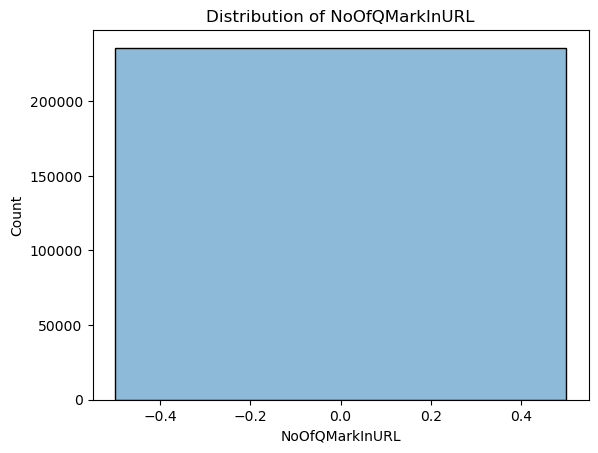

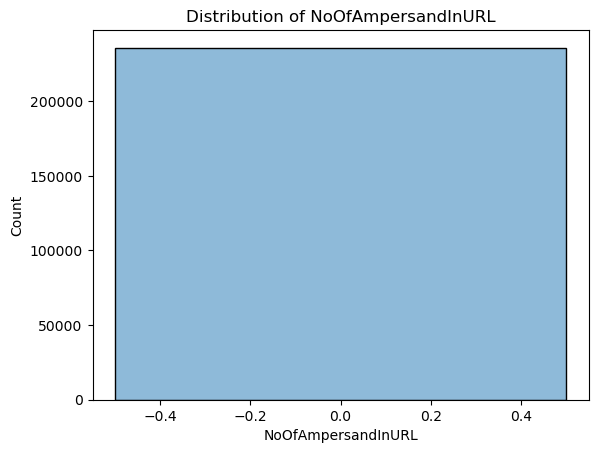

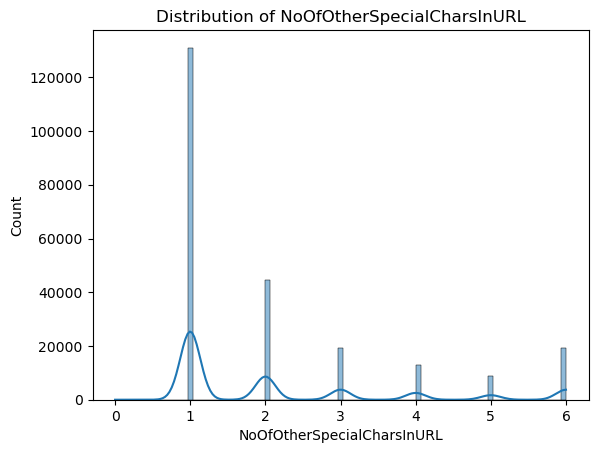

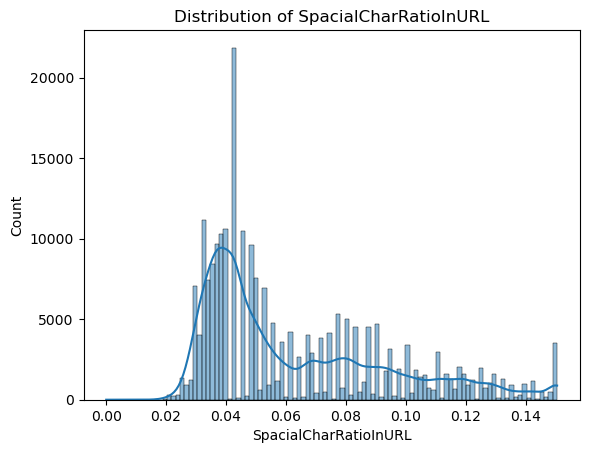

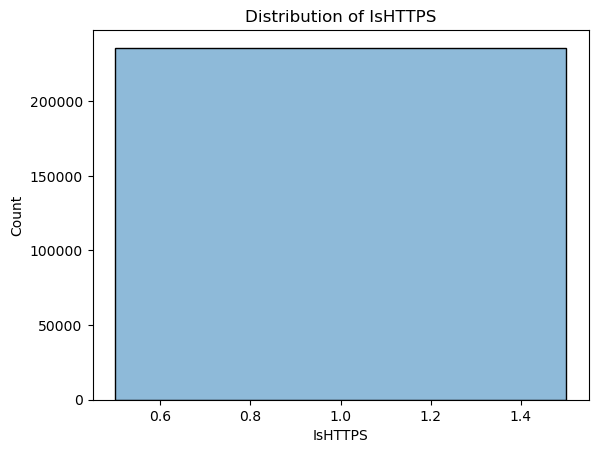

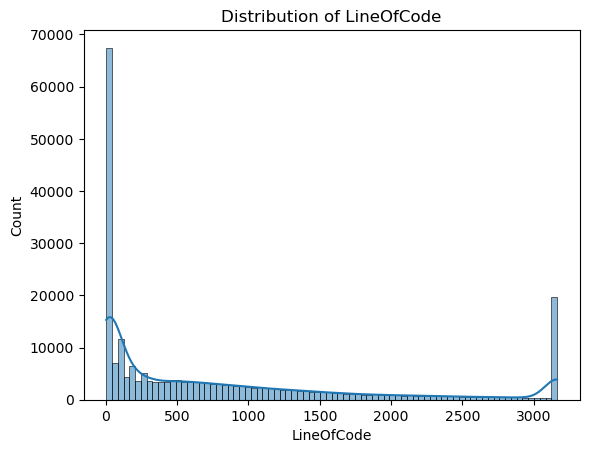

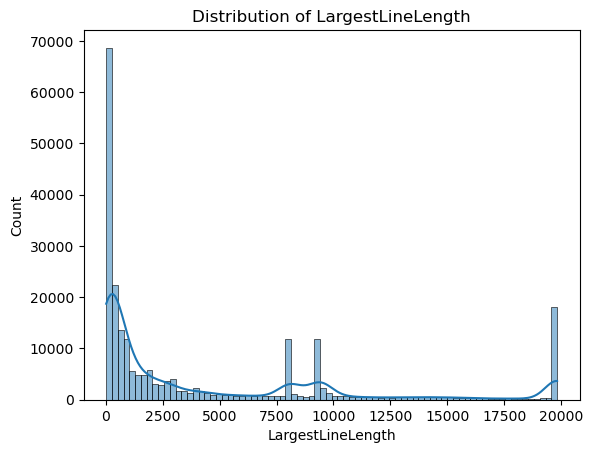

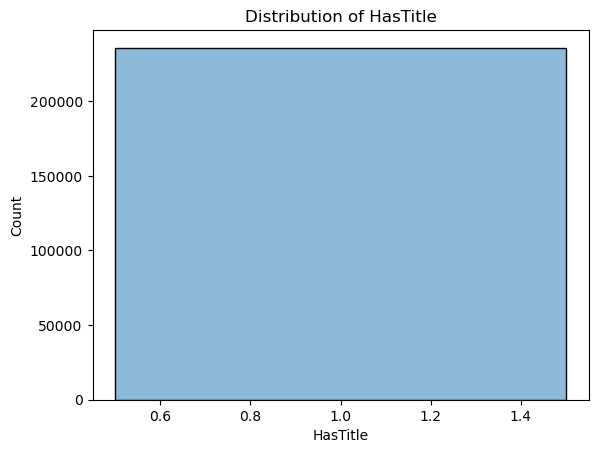

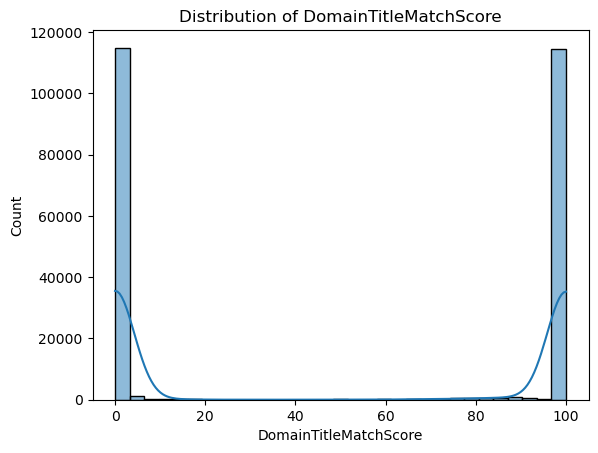

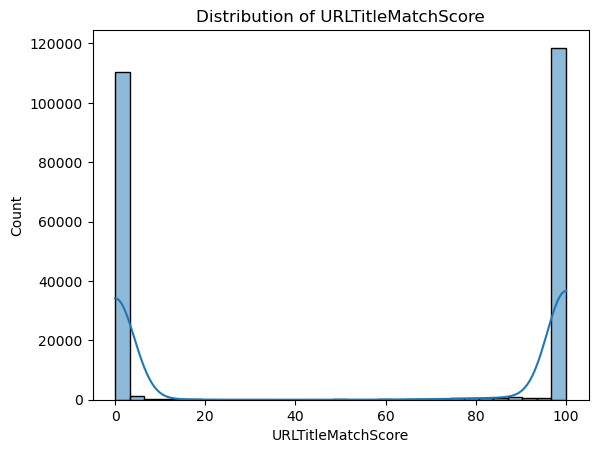

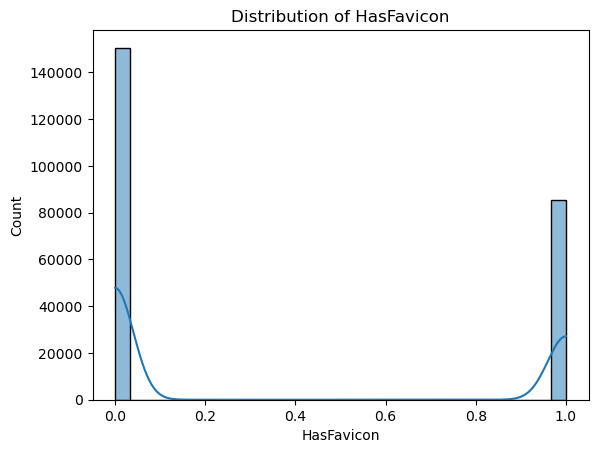

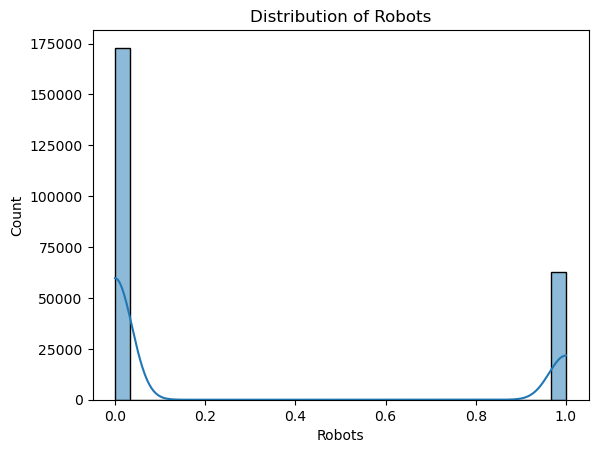

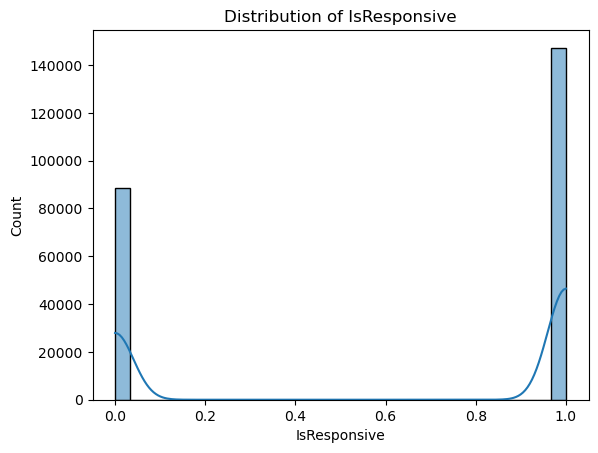

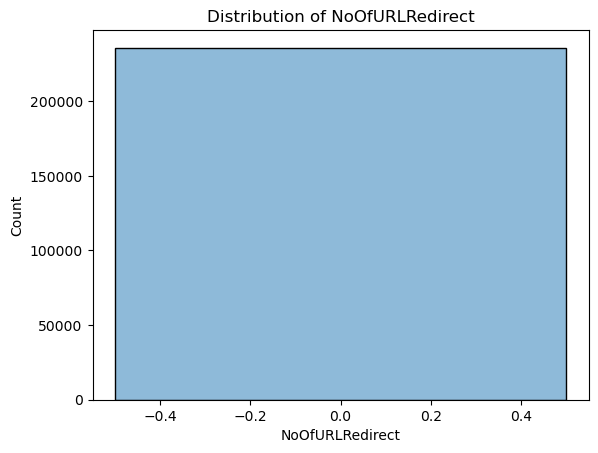

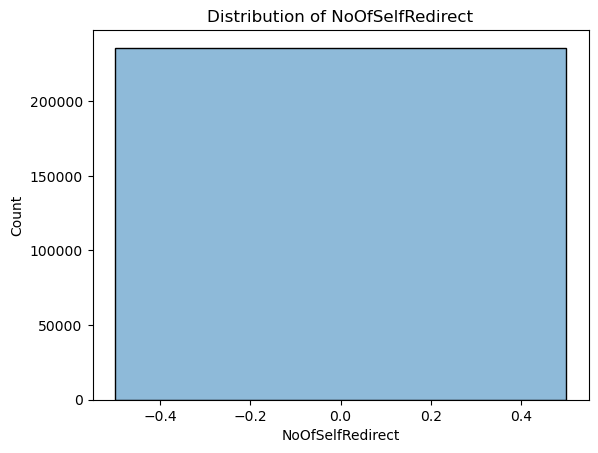

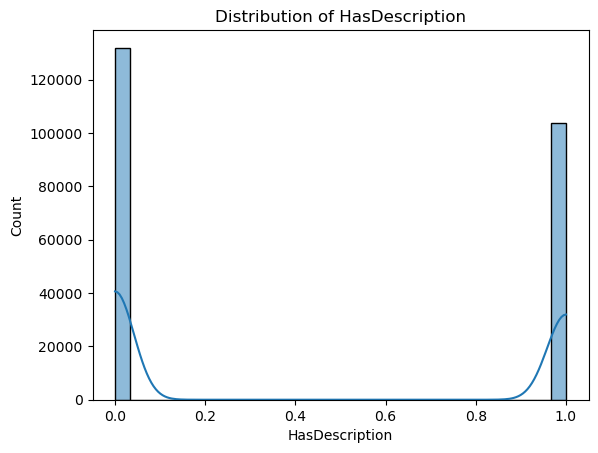

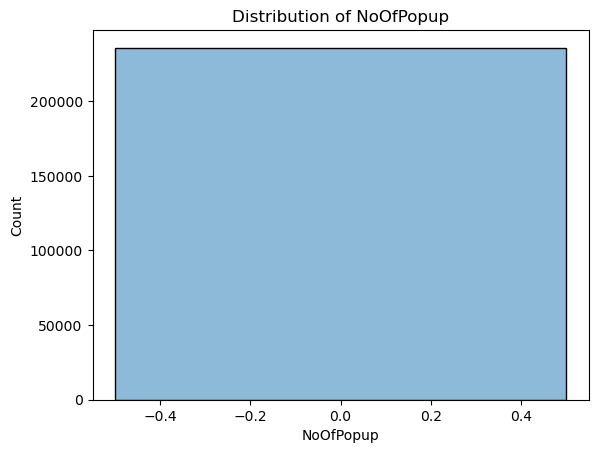

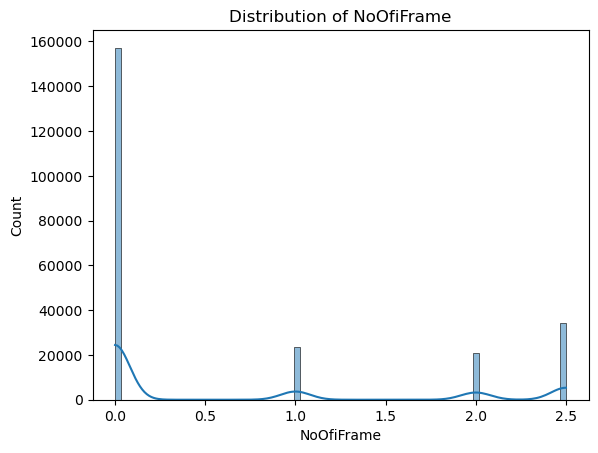

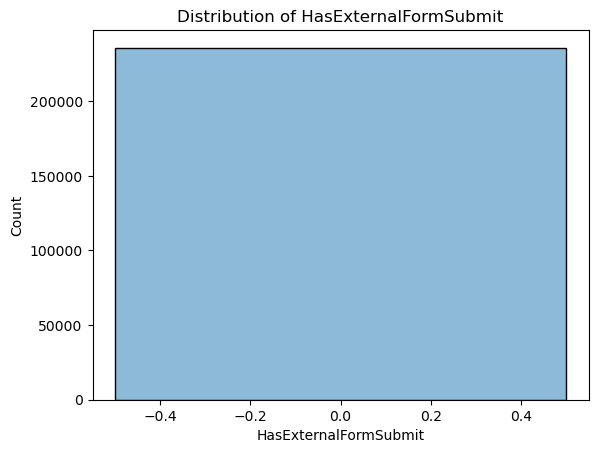

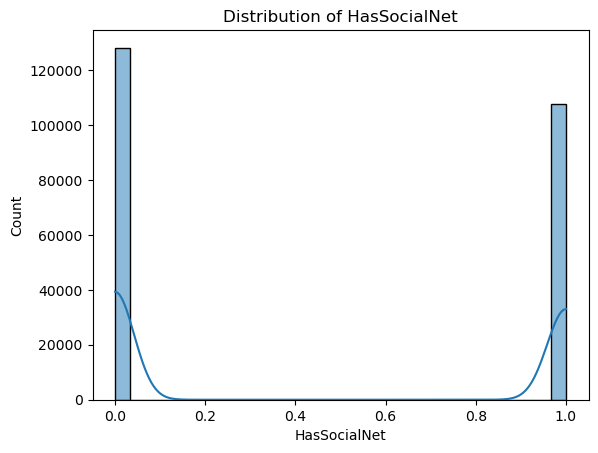

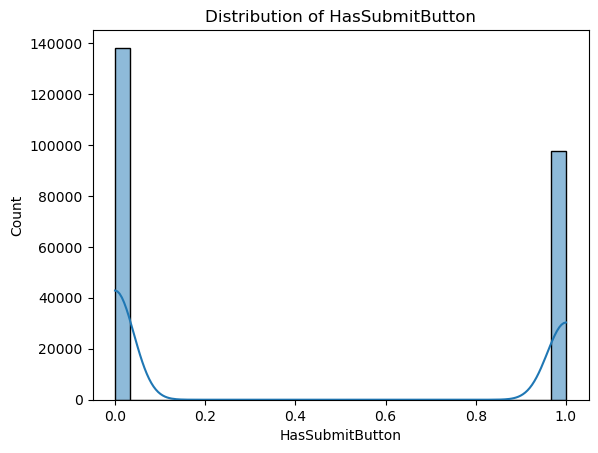

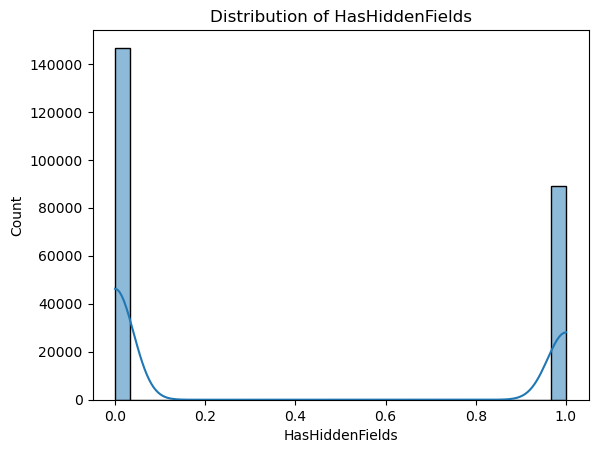

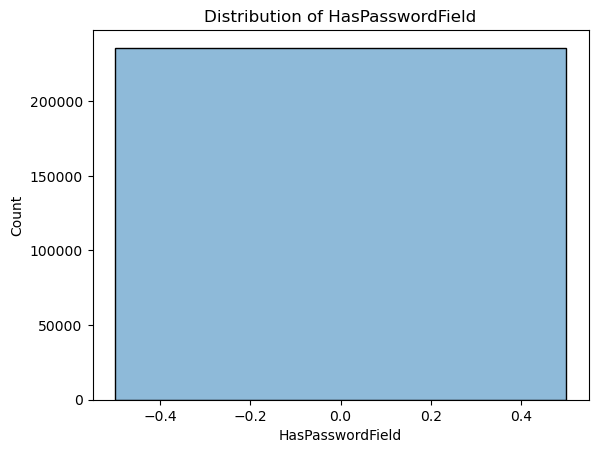

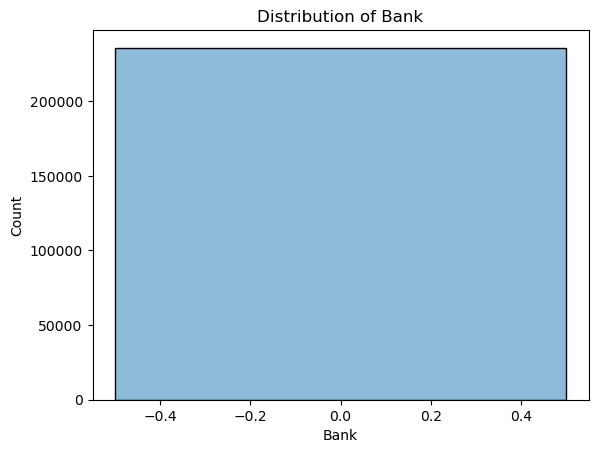

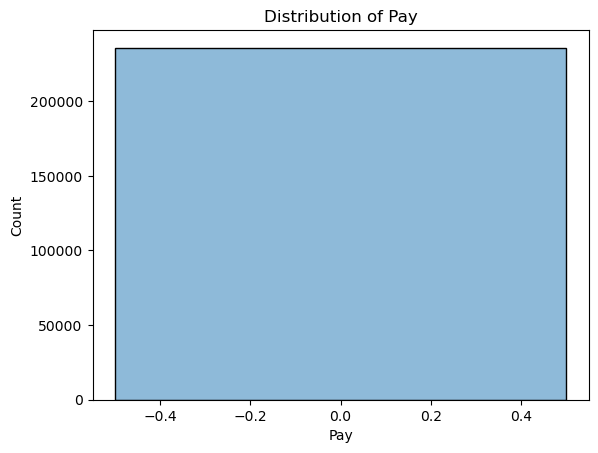

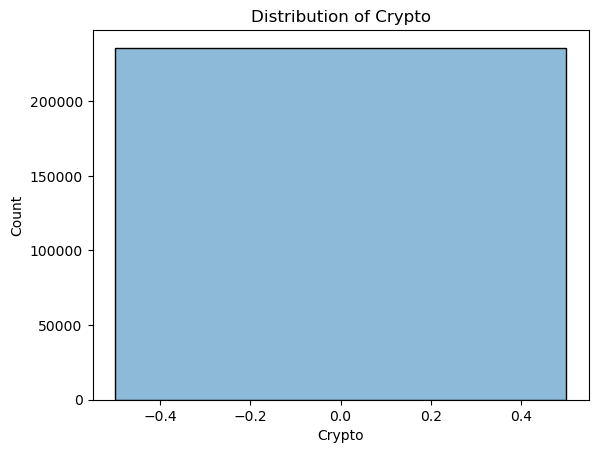

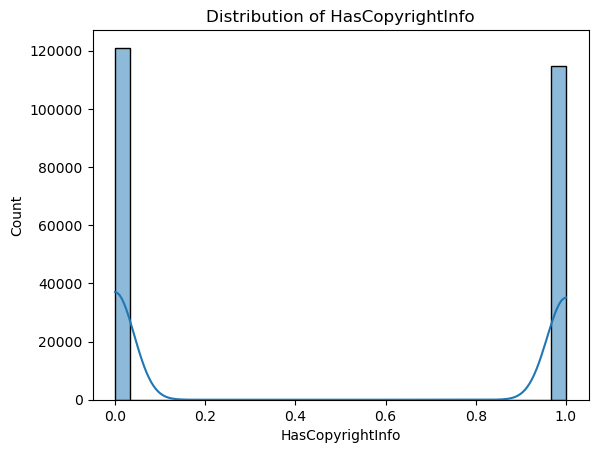

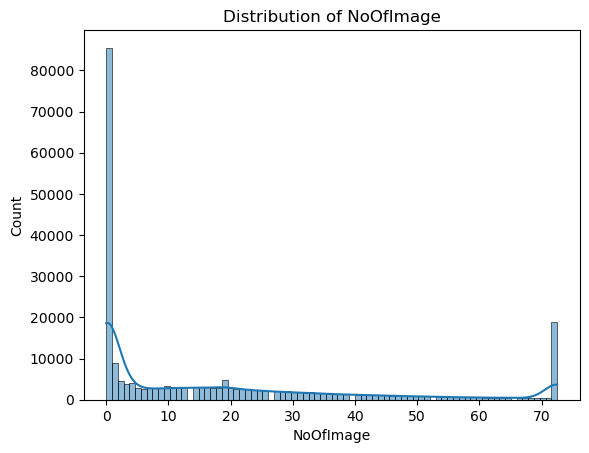

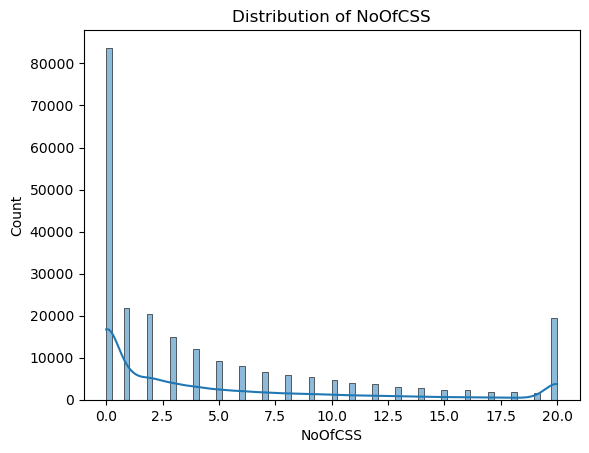

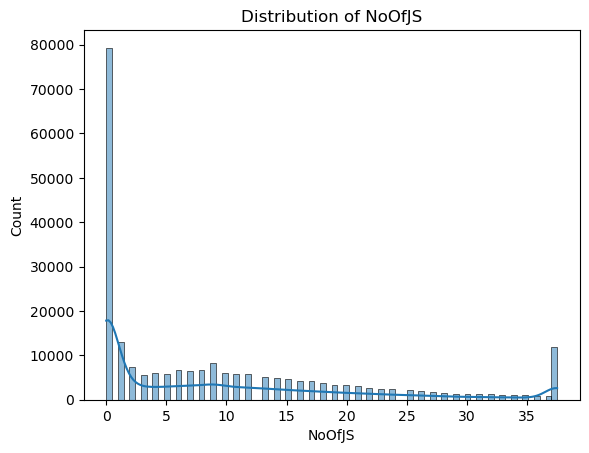

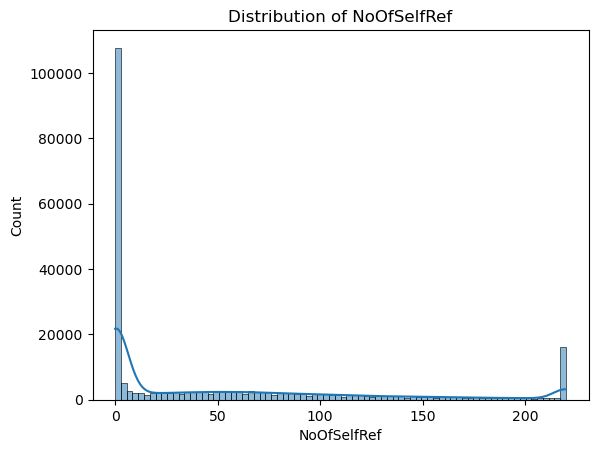

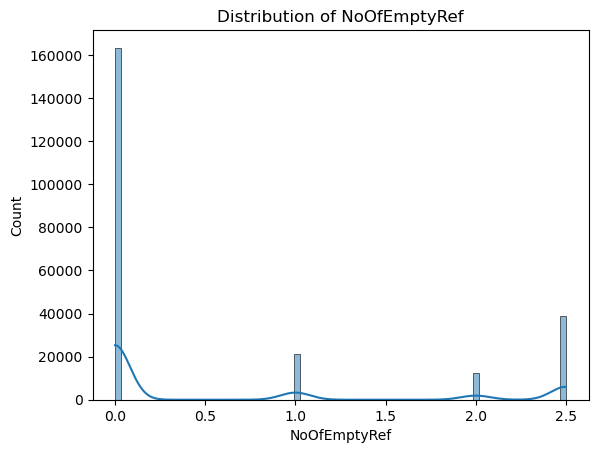

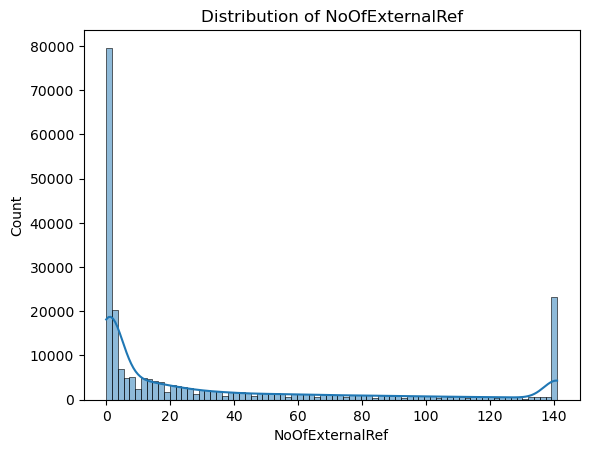

ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.

In [162]:
for i in numerical_col:
    sns.histplot(data=x, x=i, kde=True)  # kde=True adds a kernel density estimation
    plt.title(f"Distribution of {i}")
    plt.show()

In [164]:
cor = df1.corr()
df1.corr()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.748714,NaN,-0.600700,-0.485100,0.047024,-0.274641,0.114948,NaN,NaN,...,NaN,NaN,-0.273667,-0.331269,-0.276246,-0.311961,-0.358725,-0.209199,-0.321873,-0.417572
DomainLength,0.748714,1.000000,NaN,-0.295147,-0.463113,0.106542,-0.076759,0.177055,NaN,NaN,...,NaN,NaN,-0.157849,-0.170637,-0.147803,-0.170983,-0.197297,-0.123620,-0.152043,-0.218202
IsDomainIP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLSimilarityIndex,-0.600700,-0.295147,NaN,1.000000,0.548450,0.159487,0.547773,-0.053158,NaN,NaN,...,NaN,NaN,0.665541,0.789865,0.719203,0.766920,0.800385,0.471222,0.784609,0.917992
CharContinuationRate,-0.485100,-0.463113,NaN,0.548450,1.000000,0.257953,0.357399,0.104272,NaN,NaN,...,NaN,NaN,0.346422,0.392801,0.352752,0.397478,0.403492,0.238619,0.375917,0.465107
TLDLegitimateProb,0.047024,0.106542,NaN,0.159487,0.257953,1.000000,0.276895,0.460934,NaN,NaN,...,NaN,NaN,0.119104,0.115413,0.084547,0.131494,0.095564,0.047636,0.094898,0.104127
URLCharProb,-0.274641,-0.076759,NaN,0.547773,0.357399,0.276895,1.000000,0.081625,NaN,NaN,...,NaN,NaN,0.345998,0.392014,0.356522,0.384150,0.404701,0.240114,0.390150,0.464480
TLDLength,0.114948,0.177055,NaN,-0.053158,0.104272,0.460934,0.081625,1.000000,NaN,NaN,...,NaN,NaN,-0.038611,-0.077612,-0.055170,-0.039687,-0.075606,-0.063170,-0.068175,-0.073892
NoOfSubDomain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasObfuscation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

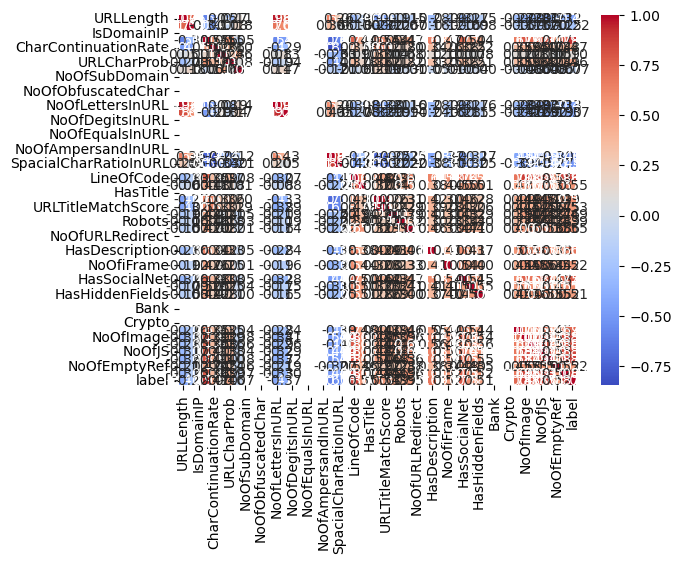

In [166]:
sns.heatmap(cor, annot = True, cmap= 'coolwarm',fmt=".2f")

In [168]:
from sklearn.feature_selection import SelectKBest, f_classif

In [170]:
sk = SelectKBest(score_func = f_classif, k=10)

In [172]:
k_best = sk.fit_transform(x,y)

D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  8  9 10 11 14 15 16 17 18 21 24 30 31 33 35 39 40 41 42] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [174]:
selected_features = x.columns[sk.get_support()]

In [176]:
selected_features

Index(['URLSimilarityIndex', 'LineOfCode', 'HasDescription', 'HasSocialNet',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfExternalRef'],
      dtype='object')

In [178]:
feature_score = pd.DataFrame({
    'features' : x.columns,
    'Scores' : sk.scores_}).sort_values(by = 'Scores', ascending = False)

In [180]:
feature_score

,features,Scores
3,URLSimilarityIndex,671857.021354
36,HasSocialNet,376744.060221
43,HasCopyrightInfo,291213.405607
32,HasDescription,214554.534151
46,NoOfJS,193709.408674
22,LineOfCode,188419.064291
44,NoOfImage,179363.432098
47,NoOfSelfRef,170201.314366
49,NoOfExternalRef,148988.847154
45,NoOfCSS,141700.141305


In [182]:
x_selected = x[selected_features]

In [184]:
x_selected.columns

Index(['URLSimilarityIndex', 'LineOfCode', 'HasDescription', 'HasSocialNet',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfExternalRef'],
      dtype='object')

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [188]:
sc = StandardScaler()

In [190]:
x_scaled = sc.fit_transform(x_selected)

In [192]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2,random_state= 42)

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [198]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [200]:
# Fitting and training the data
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

In [202]:
# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression Results:
Accuracy: 0.9996
Confusion Matrix:
[[20110    14]
 [    5 27030]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Decision Tree Results:
Accuracy: 0.9998
Confusion Matrix:
[[20122     2]
 [    8 27027]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Random Forest Results:
Accuracy: 0.9999
Confusion Matrix:
[[20122     2]
 [    1 27034]]
Classification Report:
 

In [204]:
# To create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # to save model

In [206]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy= 'mean')),
    ('scaler', StandardScaler()),
     ('model', RandomForestClassifier())
])

In [208]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [210]:
y_pred = pipeline.predict(X_test)

In [214]:
# to save the model using dump
joblib.dump(pipeline, 'phishingURl.joblib')

['phishingURl.joblib']

In [216]:
# to load 

TelecomLoaded= joblib.load('telecom.joblib')